# COSIT PAPER 2024 - PART II VARIABLES AND VISUALISATION

This notebook aim to create the variable of interest of this short paper and visualise the main statistics of those.

# STEP 1 - Upload and Parse pre-process data

In [150]:
# Load the Packages Needed:
import pandas as pd
from pathlib import Path
import numpy as np
import ast
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from datetime import datetime
from math import radians, sin, cos, sqrt, atan2
import seaborn as sns
import scipy.stats as stats
from scipy.stats import spearmanr
from scipy.stats import pearsonr
from scipy.stats import shapiro
import statsmodels.api as sm


In [151]:
# Load Tap Data Preprocessed with Apps
tap_data = pd.read_csv('cosit_2024_preprocessed.csv', usecols=lambda column: column not in ['Unnamed: 0'])
tap_data

,id,taps,start,stop,appIds0,tapsSession,lengthSession,partId,timeZone,tapDeviceId,application,category
0,018ad520-ce98-11ed-ba2a-dfe7d46df14d,"'1680119342683', '1680119355131', '16801193593...",1.680119e+12,1.680122e+12,"'4', '4', '6', '6', '23', '23', '23', '4', '6'...",574,2193873,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',"['com.miui.home', 'com.miui.home', 'com.whatsa...","('LIFESTYLE', 'LIFESTYLE', 'COMMUNICATION', 'C..."
1,04e18c70-cfa4-11ed-ba2a-dfe7d46df14d,"'1680220903986', '1680220904266', '16802209049...",1.680221e+12,1.680223e+12,"'6', '6', '6', '4', '4', '6', '6', '6', '6', '...",1616,1826819,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',"['com.whatsapp', 'com.whatsapp', 'com.whatsapp...","('COMMUNICATION', 'COMMUNICATION', 'COMMUNICAT..."
2,04f2a370-cfa4-11ed-ba2a-dfe7d46df14d,"'1680220903986', '1680220904266', '16802209049...",1.680221e+12,1.680223e+12,"'6', '6', '6', '4', '4', '6', '6', '6', '6', '...",1616,1826819,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',"['com.whatsapp', 'com.whatsapp', 'com.whatsapp...","('COMMUNICATION', 'COMMUNICATION', 'COMMUNICAT..."
3,04fd78e0-cfa4-11ed-ba2a-dfe7d46df14d,"'1680220903986', '1680220904266', '16802209049...",1.680221e+12,1.680223e+12,"'6', '6', '6', '4', '4', '6', '6', '6', '6', '...",1616,1826819,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',"['com.whatsapp', 'com.whatsapp', 'com.whatsapp...","('COMMUNICATION', 'COMMUNICATION', 'COMMUNICAT..."
4,051edc40-cc72-11ed-ba2a-dfe7d46df14d,"'1679902268000', '1679902268713', '16799022821...",1.679902e+12,1.679902e+12,"'4', '4', '20', '20', '20', '20', '20'",7,27638,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',"['com.miui.home', 'com.miui.home', 'com.google...","('LIFESTYLE', 'LIFESTYLE', 'TRAVEL_AND_LOCAL',..."
...,...,...,...,...,...,...,...,...,...,...,...,...
4321,bfe6041f-3f74-42a1-87a3-8ce1f144c8f5,"'1687679228006', '1687679228415', '16876792284...",1.687679e+12,1.687679e+12,"'13', '13', '13', '13', '13', '13', '13', '13'...",42,26463,138e9bf04d3d99d64bed81ad6365356657f628eb,'Asia/Karachi','23cdf842-3f63-4bec-bd24-cf229e718c1e',"['com.google.android.googlequicksearchbox', 'c...","('TOOLS', 'TOOLS', 'TOOLS', 'TOOLS', 'TOOLS', ..."
4322,d24a1676-05dd-4ee7-ab7b-abfbe6e57e5a,"'1687679583122', '1687679584175', '16876795855...",1.687680e+12,1.687680e+12,"'13', '20', '2', '2'",4,3094,138e9bf04d3d99d64bed81ad6365356657f628eb,'Asia/Karachi','23cdf842-3f63-4bec-bd24-cf229e718c1e',"['com.google.android.googlequicksearchbox', 'c...","('TOOLS', 'TRAVEL_AND_LOCAL', 'TOOLS', 'TOOLS')"
4323,f88771f5-8e02-48e1-93bc-7c7fe7b23564,"'1687926778680', '1687926779084', '16879267794...",1.687927e+12,1.687927e+12,"'2', '2', '2', '2', '2', '2', '2', '20', '20',...",36,52744,138e9bf04d3d99d64bed81ad6365356657f628eb,'Asia/Karachi','23cdf842-3f63-4bec-bd24-cf229e718c1e',"['com.lge.launcher3', 'com.lge.launcher3', 'co...","('TOOLS', 'TOOLS', 'TOOLS', 'TOOLS', 'TOOLS', ..."
4324,f8c448f8-734a-4180-a8cc-4cf2bed6adb2,"'1686322041785', '1686322042357', '16863220466...",1.686322e+12,1.686323e+12,"'3', '3', '4', '4', '4', '4', '2', '2', '2', '...",559,518806,138e9bf04d3d99d64bed81ad6365356657f628eb,'Asia/Karachi','5eea8028-43e5-46ad-8eed-84cbf65f36fb',"['com.android.settings', 'com.android.settings...","('TOOLS', 'TOOLS', 'COMMUNICATION', 'COMMUNICA..."


Before calculating my variable, make sure that the list of taps are ordered. If not then could create problem when computing my key variables.

In [152]:
def parse_timestamps_ms(ts_list):
    # Convert each timestamp string to an integer, then to a datetime object
    return [datetime.fromtimestamp(int(ts) / 1000.0) for ts in ts_list]

In [153]:
def timestamps_in_order(row):
    timestamps = parse_timestamps_ms(ast.literal_eval(row['taps']) if isinstance(row['taps'], str) else row['taps'])
    # Check if the list of timestamps is sorted in ascending order
    return all(timestamps[i] <= timestamps[i + 1] for i in range(len(timestamps) - 1))

# Apply this function to each row and add a new column to indicate if timestamps are in order
tap_data['timestamps_in_order'] = tap_data.apply(timestamps_in_order, axis=1)

# Now, you can filter to see which rows have timestamps not in order
rows_with_unordered_timestamps = tap_data[~tap_data['timestamps_in_order']]

# Print the number of rows with unordered timestamps to see how widespread the issue is
print(f"Number of rows with unordered timestamps: {len(rows_with_unordered_timestamps)}")

# Optionally, print or inspect some of these rows to understand the discrepancies
print(rows_with_unordered_timestamps['taps'])

Number of rows with unordered timestamps: 446
871     '1680846894363', '1680846895550', '16808468965...
1565    '1680401647014', '1680401647593', '16804016482...
1671    '1683175247664', '1683175249662', '16831752506...
1672    '1683095370422', '1683095396123', '16830953964...
1673    '1681896286976', '1681896287874', '16818962897...
                              ...                        
3849    '1686394989711', '1686394990896', '16863949923...
3850    '1686415967965', '1686415968857', '16864159696...
3851    '1686552821294', '1686552822112', '16865528212...
3852    '1686805854040', '1686805859262', '16868058598...
3853    '1685812334350', '1685812334712', '16858123357...
Name: taps, Length: 446, dtype: object


Order them...

In [154]:
def sort_all_associated_columns(row):
    # Parse the 'tap_ts' data
    tap_ts = parse_timestamps_ms(ast.literal_eval(row['taps']) if isinstance(row['taps'], str) else row['taps'])
    
    # Assuming 'category', 'latitude', 'longitude', and 'altitude' are stored in a similar format
    categories = ast.literal_eval(row['category']) if isinstance(row['category'], str) else row['category']
    #latitudes = ast.literal_eval(row['latitude']) if isinstance(row['latitude'], str) else row['latitude']
    #longitudes = ast.literal_eval(row['longitude']) if isinstance(row['longitude'], str) else row['longitude']
    #altitudes = ast.literal_eval(row['altitude']) if isinstance(row['altitude'], str) else row['altitude']
    applications = ast.literal_eval(row['application']) if isinstance(row['application'], str) else row['application']
    # Combine the lists into a list of tuples
    combined_list = list(zip(tap_ts, categories,applications))
    
    # Sort the combined list by the timestamps
    sorted_combined_list = sorted(combined_list, key=lambda x: x[0])
    
    # Separate the sorted combined list back into individual lists
    sorted_tap_ts, sorted_categories, sorted_applications = zip(*sorted_combined_list)
    
    # Update the row with sorted data
    row['taps'] = list(sorted_tap_ts)  # Adjust according to your storage format
    row['category'] = list(sorted_categories)
    #row['latitude'] = list(sorted_latitudes)
    #row['longitude'] = list(sorted_longitudes)
    #row['altitude'] = list(sorted_altitudes)
    row['application'] = list(sorted_applications)
    return row

In [155]:
tap_data = tap_data.apply(sort_all_associated_columns, axis=1)
tap_data

,id,taps,start,stop,appIds0,tapsSession,lengthSession,partId,timeZone,tapDeviceId,application,category,timestamps_in_order
0,018ad520-ce98-11ed-ba2a-dfe7d46df14d,"[2023-03-29 21:49:02.683000, 2023-03-29 21:49:...",1.680119e+12,1.680122e+12,"'4', '4', '6', '6', '23', '23', '23', '4', '6'...",574,2193873,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',"[com.miui.home, com.miui.home, com.whatsapp, c...","[LIFESTYLE, LIFESTYLE, COMMUNICATION, COMMUNIC...",True
1,04e18c70-cfa4-11ed-ba2a-dfe7d46df14d,"[2023-03-31 02:01:43.986000, 2023-03-31 02:01:...",1.680221e+12,1.680223e+12,"'6', '6', '6', '4', '4', '6', '6', '6', '6', '...",1616,1826819,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',"[com.whatsapp, com.whatsapp, com.whatsapp, com...","[COMMUNICATION, COMMUNICATION, COMMUNICATION, ...",True
2,04f2a370-cfa4-11ed-ba2a-dfe7d46df14d,"[2023-03-31 02:01:43.986000, 2023-03-31 02:01:...",1.680221e+12,1.680223e+12,"'6', '6', '6', '4', '4', '6', '6', '6', '6', '...",1616,1826819,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',"[com.whatsapp, com.whatsapp, com.whatsapp, com...","[COMMUNICATION, COMMUNICATION, COMMUNICATION, ...",True
3,04fd78e0-cfa4-11ed-ba2a-dfe7d46df14d,"[2023-03-31 02:01:43.986000, 2023-03-31 02:01:...",1.680221e+12,1.680223e+12,"'6', '6', '6', '4', '4', '6', '6', '6', '6', '...",1616,1826819,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',"[com.whatsapp, com.whatsapp, com.whatsapp, com...","[COMMUNICATION, COMMUNICATION, COMMUNICATION, ...",True
4,051edc40-cc72-11ed-ba2a-dfe7d46df14d,"[2023-03-27 09:31:08, 2023-03-27 09:31:08.7130...",1.679902e+12,1.679902e+12,"'4', '4', '20', '20', '20', '20', '20'",7,27638,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',"[com.miui.home, com.miui.home, com.google.andr...","[LIFESTYLE, LIFESTYLE, TRAVEL_AND_LOCAL, TRAVE...",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4321,bfe6041f-3f74-42a1-87a3-8ce1f144c8f5,"[2023-06-25 09:47:08.006000, 2023-06-25 09:47:...",1.687679e+12,1.687679e+12,"'13', '13', '13', '13', '13', '13', '13', '13'...",42,26463,138e9bf04d3d99d64bed81ad6365356657f628eb,'Asia/Karachi','23cdf842-3f63-4bec-bd24-cf229e718c1e',"[com.google.android.googlequicksearchbox, com....","[TOOLS, TOOLS, TOOLS, TOOLS, TOOLS, TOOLS, TOO...",True
4322,d24a1676-05dd-4ee7-ab7b-abfbe6e57e5a,"[2023-06-25 09:53:03.122000, 2023-06-25 09:53:...",1.687680e+12,1.687680e+12,"'13', '20', '2', '2'",4,3094,138e9bf04d3d99d64bed81ad6365356657f628eb,'Asia/Karachi','23cdf842-3f63-4bec-bd24-cf229e718c1e',"[com.google.android.googlequicksearchbox, com....","[TOOLS, TRAVEL_AND_LOCAL, TOOLS, TOOLS]",True
4323,f88771f5-8e02-48e1-93bc-7c7fe7b23564,"[2023-06-28 06:32:58.680000, 2023-06-28 06:32:...",1.687927e+12,1.687927e+12,"'2', '2', '2', '2', '2', '2', '2', '20', '20',...",36,52744,138e9bf04d3d99d64bed81ad6365356657f628eb,'Asia/Karachi','23cdf842-3f63-4bec-bd24-cf229e718c1e',"[com.lge.launcher3, com.lge.launcher3, com.lge...","[TOOLS, TOOLS, TOOLS, TOOLS, TOOLS, TOOLS, TOO...",True
4324,f8c448f8-734a-4180-a8cc-4cf2bed6adb2,"[2023-06-09 16:47:21.785000, 2023-06-09 16:47:...",1.686322e+12,1.686323e+12,"'3', '3', '4', '4', '4', '4', '2', '2', '2', '...",559,518806,138e9bf04d3d99d64bed81ad6365356657f628eb,'Asia/Karachi','5eea8028-43e5-46ad-8eed-84cbf65f36fb',"[com.android.settings, com.android.settings, c...","[TOOLS, TOOLS, COMMUNICATION, COMMUNICATION, C...",True


In [157]:
# Remove the first and last character (brackets) from each string in the 'application' column
tap_data['application'] = tap_data['application'].str[1:-1]


In [158]:
# Correcting the function to use len() for counting elements in a list
tap_data['count_all'] = tap_data['category'].apply(lambda x: len(x) if isinstance(x, list) else 0)
tap_data['count_all']

0        574
1       1616
2       1616
3       1616
4          7
        ... 
4321      42
4322       4
4323      36
4324     559
4325      59
Name: count_all, Length: 4326, dtype: int64

In [159]:
tap_data['count_maps'] = tap_data['category'].apply(lambda x: x.count('MAPS_AND_NAVIGATION') + x.count('TRAVEL_AND_LOCAL') if isinstance(x, list) else 0)
tap_data['count_maps']

0       102
1         5
2         5
3         5
4         5
       ... 
4321     26
4322      1
4323     29
4324     19
4325     55
Name: count_maps, Length: 4326, dtype: int64

In [160]:
tap_data['prop_map_counts'] = tap_data['count_maps']/tap_data['count_all']
tap_data['prop_map_counts']

0       0.177700
1       0.003094
2       0.003094
3       0.003094
4       0.714286
          ...   
4321    0.619048
4322    0.250000
4323    0.805556
4324    0.033989
4325    0.932203
Name: prop_map_counts, Length: 4326, dtype: float64

In [161]:
def count_swaps_between_different_categories(categories):
    # Initialize count
    count = 0
    # Iterate through the list, except the last element, to compare each category with the next one
    for i in range(len(categories) - 1):
        # Increment count if the current category is different from the next one
        if categories[i] != categories[i + 1]:
            count += 1
    return count

# Apply the counting function to the 'category' column, only for list entries
tap_data['swaps_all'] = tap_data['category'].apply(lambda x: count_swaps_between_different_categories(x) if isinstance(x, list) else 0)

# This results in 'swaps_all' containing the count of all category swaps for each phone session, 
# where a swap is counted only when switching to a different category
print(tap_data[['category', 'swaps_all']])


                                               category  swaps_all
0     [LIFESTYLE, LIFESTYLE, COMMUNICATION, COMMUNIC...         42
1     [COMMUNICATION, COMMUNICATION, COMMUNICATION, ...          9
2     [COMMUNICATION, COMMUNICATION, COMMUNICATION, ...          9
3     [COMMUNICATION, COMMUNICATION, COMMUNICATION, ...          9
4     [LIFESTYLE, LIFESTYLE, TRAVEL_AND_LOCAL, TRAVE...          1
...                                                 ...        ...
4321  [TOOLS, TOOLS, TOOLS, TOOLS, TOOLS, TOOLS, TOO...          2
4322            [TOOLS, TRAVEL_AND_LOCAL, TOOLS, TOOLS]          2
4323  [TOOLS, TOOLS, TOOLS, TOOLS, TOOLS, TOOLS, TOO...          1
4324  [TOOLS, TOOLS, COMMUNICATION, COMMUNICATION, C...          9
4325  [TOOLS, TOOLS, TRAVEL_AND_LOCAL, TRAVEL_AND_LO...          3

[4326 rows x 2 columns]


In [162]:
import pandas as pd

# Count swaps FROM 'MAPS_AND_NAVIGATION' or 'TRAVEL_AND_LOCAL' to another category
tap_data['swaps_from'] = tap_data['category'].apply(
    lambda x: len([
        b for a, b in zip(x[:-1], x[1:]) 
        if a in ['MAPS_AND_NAVIGATION', 'TRAVEL_AND_LOCAL'] and b not in ['MAPS_AND_NAVIGATION', 'TRAVEL_AND_LOCAL'] and a != b
    ])
)

# Count swaps TO 'MAPS_AND_NAVIGATION' or 'TRAVEL_AND_LOCAL' from another category
tap_data['swaps_to'] = tap_data['category'].apply(
    lambda x: len([
        b for a, b in zip(x[:-1], x[1:]) 
        if b in ['MAPS_AND_NAVIGATION', 'TRAVEL_AND_LOCAL'] and a not in ['MAPS_AND_NAVIGATION', 'TRAVEL_AND_LOCAL'] and a != b
    ])
)



In [163]:
# Swaps from and to summed = swap map all
tap_data['swaps_map_all'] = tap_data['swaps_from'] + tap_data['swaps_to']

print(f" Total swaps from and to a map {tap_data['swaps_map_all']}")


 Total swaps from and to a map 0       4
1       2
2       2
3       2
4       1
       ..
4321    2
4322    2
4323    1
4324    2
4325    3
Name: swaps_map_all, Length: 4326, dtype: int64


In [164]:
tap_data['swaps_map_all'].max()

31

In [165]:
# Total Proportion of Transitions Involving Either Category:
tap_data['prop_swap_maps'] = tap_data.apply(
    lambda row: row['swaps_map_all'] / row['swaps_all'] if row['swaps_all'] > 0 else np.nan, 
    axis=1)

# Proportion of Transitions Away from Either Category:
tap_data['swaps_from_prop'] = tap_data.apply(
    lambda row: row['swaps_from'] / row['swaps_all'] if row['swaps_all'] > 0 else np.nan, 
    axis=1)

# Proportion of Transitions Into Either Category:
tap_data['swaps_to_prop'] = tap_data.apply(
    lambda row: row['swaps_to'] / row['swaps_all'] if row['swaps_all'] > 0 else np.nan, 
    axis=1)


print(f" Proportion of swap_to_maps over all swaps of a phone session:{tap_data['swaps_to_prop']}")
print()
print(f" Proportion of swap_from_maps over all swaps of a phone session:{tap_data['swaps_from_prop']}")
print()
print(f" Proportion of total swaps of maps all swaps of a phone session:{tap_data['prop_swap_maps']}")


 Proportion of swap_to_maps over all swaps of a phone session:0       0.047619
1       0.111111
2       0.111111
3       0.111111
4       1.000000
          ...   
4321    0.500000
4322    0.500000
4323    1.000000
4324    0.111111
4325    0.666667
Name: swaps_to_prop, Length: 4326, dtype: float64

 Proportion of swap_from_maps over all swaps of a phone session:0       0.047619
1       0.111111
2       0.111111
3       0.111111
4       0.000000
          ...   
4321    0.500000
4322    0.500000
4323    0.000000
4324    0.111111
4325    0.333333
Name: swaps_from_prop, Length: 4326, dtype: float64

 Proportion of total swaps of maps all swaps of a phone session:0       0.095238
1       0.222222
2       0.222222
3       0.222222
4       1.000000
          ...   
4321    1.000000
4322    1.000000
4323    1.000000
4324    0.222222
4325    1.000000
Name: prop_swap_maps, Length: 4326, dtype: float64


In [166]:
# Convert string representations of lists to actual lists
tap_data['taps'] = tap_data['taps'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
tap_data['taps'] = tap_data['taps'].apply(lambda x: [x] if isinstance(x, str) else x)

In [167]:
from datetime import datetime

def calculate_total_time(ts_list):
    if not ts_list or len(ts_list) < 2:
        return 0
    total_time = 0
    # Iterate through the list of timestamps
    for i in range(len(ts_list) - 1):
        # Calculate the time difference between consecutive timestamps
        time_diff = (ts_list[i + 1] - ts_list[i]).total_seconds()
        total_time += time_diff
    return total_time

# Assuming 'tap_ts' contains lists of datetime objects. If not, convert them first.
# For example, if timestamps are in string format or milliseconds since the epoch,
# you will need to convert these to datetime objects.

# Example conversion (uncomment and modify as needed):
# def parse_timestamps_ms(ts_list):
#     return [datetime.fromtimestamp(ts / 1000.0) for ts in ts_list]

# tap_data['tap_ts'] = tap_data['tap_ts'].apply(parse_timestamps_ms)

# Now, apply the modified function to each row to calculate total time spent
tap_data['total_time_spent'] = tap_data['taps'].apply(calculate_total_time)

# Printing the total time spent for inspection
# for i, total_time in enumerate(tap_data['total_time_spent']):
#     print(f"Row {i}: Total time spent = {total_time} seconds")


In [168]:
descriptive_stats = tap_data.groupby('partId')['total_time_spent'].describe()
descriptive_stats

,count,mean,std,min,25%,50%,75%,max
partId,,,,,,,,
138e045f2f3d760c43f98efbae290a72265928eb,2.0,68.363000,94.995553,1.191,34.77700,68.3630,101.94900,135.535
138e065decdc4da446ff9ad5657e0eb6528428eb,20.0,145.203050,242.433727,6.228,24.69725,53.4550,92.81125,863.494
138e07f308e278af4ca4a5c42d93ec77204928eb,36.0,82.193306,129.590850,1.268,7.65550,18.6025,108.89950,578.107
138e0825ddad2b2b4d2b8e9ca20bbab9fec128eb,76.0,229.869553,539.526628,0.691,11.00100,38.7080,141.62125,3139.953
138e0a891f880f894e2e99e3bc80fcfac7b428eb,111.0,259.574045,403.541798,1.380,25.79450,63.2930,328.61450,1962.592
138e0f6ee02da3074ef4aaccce4b2bf8d45328eb,105.0,235.426267,475.456444,0.385,22.11200,57.7860,222.19600,3713.003
138e1d0b283c18c942d08651e3a6a8b08ea728eb,39.0,1401.338923,908.894190,23.991,693.92350,1430.6230,1976.63950,3279.924
138e1e0b1a1fb67b4088b18b4f3e9b1d713028eb,7.0,211.814286,326.215456,12.698,45.74400,47.6470,200.24500,930.377
138e1f58870b7d0749f5af2e1c5bf4744f6a28eb,8.0,309.544750,645.452169,0.040,50.64975,89.1230,139.68950,1898.223


In [169]:
#map time only

def calculate_map_time(row):
    categories = ast.literal_eval(row['category']) if isinstance(row['category'], str) else row['category']
    timestamps = ast.literal_eval(row['taps']) if isinstance(row['taps'], str) else row['taps']
    
    total_time_on_map = 0
    map_session_start = None

    for i in range(len(categories)):
        # Check if current category is map-related and we haven't started a map session
        if categories[i] in ['MAPS_AND_NAVIGATION', 'TRAVEL_AND_LOCAL'] and map_session_start is None:
            map_session_start = timestamps[i]
        # If we are ending a map session or at the last element and it's map-related
        elif map_session_start is not None and (categories[i] not in ['MAPS_AND_NAVIGATION', 'TRAVEL_AND_LOCAL'] or i == len(categories) - 1):
            # Calculate end time
            end_time = timestamps[i]
            if categories[i] in ['MAPS_AND_NAVIGATION', 'TRAVEL_AND_LOCAL'] and i+1 < len(timestamps):
                end_time = timestamps[i+1]
            # Calculate the duration and add it to the total
            total_time_on_map += (end_time - map_session_start).total_seconds()
            # Reset the start time for the next map session
            map_session_start = None

    return total_time_on_map

tap_data['total_time_spent_on_map'] = tap_data.apply(calculate_map_time, axis=1)

print(f"Total Time Spent on mobile map only {tap_data['total_time_spent_on_map']}")



Total Time Spent on mobile map only 0       86.243
1        4.653
2        4.653
3        4.653
4       13.515
         ...  
4321    18.766
4322     1.381
4323    44.741
4324    30.557
4325    90.837
Name: total_time_spent_on_map, Length: 4326, dtype: float64


In [170]:
# proportion

tap_data['proportion_time_on_map'] = tap_data['total_time_spent_on_map'] / tap_data['total_time_spent']

# # # Replace any NaN values with 0 (which could occur if 'total_time_spent' is 0)
# tap_data['proportion_time_on_map'].fillna(0, inplace=True)

# # # Ensure division by zero is handled
# tap_data['proportion_time_on_map'] = tap_data['proportion_time_on_map'].replace([np.inf, -np.inf], 0)
print(f"Proportion of time spent on map compared to all time on a phone session {tap_data['proportion_time_on_map']}")


Proportion of time spent on map compared to all time on a phone session 0       0.039311
1       0.002547
2       0.002547
3       0.002547
4       0.489001
          ...   
4321    0.709141
4322    0.446348
4323    0.848267
4324    0.058899
4325    0.933413
Name: proportion_time_on_map, Length: 4326, dtype: float64


In [171]:
tap_data.columns

Index(['id', 'taps', 'start', 'stop', 'appIds0', 'tapsSession',
       'lengthSession', 'partId', 'timeZone', 'tapDeviceId', 'application',
       'category', 'timestamps_in_order', 'count_all', 'count_maps',
       'prop_map_counts', 'swaps_all', 'swaps_from', 'swaps_to',
       'swaps_map_all', 'prop_swap_maps', 'swaps_from_prop', 'swaps_to_prop',
       'total_time_spent', 'total_time_spent_on_map',
       'proportion_time_on_map'],
      dtype='object')

In [172]:
tap_data = tap_data.drop(columns =['timestamps_in_order'])
tap_data.columns

Index(['id', 'taps', 'start', 'stop', 'appIds0', 'tapsSession',
       'lengthSession', 'partId', 'timeZone', 'tapDeviceId', 'application',
       'category', 'count_all', 'count_maps', 'prop_map_counts', 'swaps_all',
       'swaps_from', 'swaps_to', 'swaps_map_all', 'prop_swap_maps',
       'swaps_from_prop', 'swaps_to_prop', 'total_time_spent',
       'total_time_spent_on_map', 'proportion_time_on_map'],
      dtype='object')

# STEP 3: ADD THE BEHAVIOURAL SCORES INFORMATION

In this phase of the analysis, we will enrich our dataset with two primary variables of interest:

- **SBDS_Score**: This variable represents the *Santa Barbara Sense of Direction* score, which is a measure of an individual's innate ability to navigate and understand spatial environments.

- **SA_Score**: Denoting *Spatial Anxiety*, this variable quantifies the level of anxiety or discomfort an individual experiences in situations requiring spatial navigation or orientation.

These variables are crucial for our analysis as they provide insights into the psychological and cognitive aspects of spatial awareness and anxiety, respectively.

In [173]:
# Load the Santa Barbara Sense of Direction Scores of my participants 
data_folder = Path('/Users/donatellazingaro/Desktop/UZH_Leiden_collaboration/SBSD_MoT_score.csv')
data_SBSD = pd.read_csv(data_folder, index_col=0, usecols=['Participant', 'partId', 'Age', 'Gender','SBDS_score'])


data_SBSD = data_SBSD.dropna()
# Reset the index without keeping the old index
data_SBSD = data_SBSD.reset_index(drop=True)

# Now, data_SBSD is cleaned of NA values and has a reset index
data_SBSD

# Load the Spatial Anxiety scores of my participants 
data_folder = Path('/Users/donatellazingaro/Desktop/UZH_Leiden_collaboration/SA_MoT_score .csv')
data_SA = pd.read_csv(data_folder,index_col=0,usecols=['Participant', 'partId', 'Age', 'Gender','SA_Score'])
data_SA = data_SA.dropna()
# Reset the index without keeping the old index
data_SA = data_SA.reset_index(drop=True)
data_SA 

,partId,Age,Gender,SA_Score
0,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,18-24,M,1.54
1,138eb94ea78809d940b39d115925c3ee6adb28eb,25-34,M,2.23
2,138ebf3eef0581764132a77e46323a31774428eb,18-24,M,2.69
3,138e0825ddad2b2b4d2b8e9ca20bbab9fec128eb,25-34,M,3.00
4,138eeb714cefeb874896b738ea8f6607cfbe28eb,35-44,M,1.31
...,...,...,...,...
56,138ed438e978e2e744f8a438789f01b34fab28eb,25-34,M,3.77
57,138e754056c33513459f9eec6f85643feab928eb,25-34,F,2.77
58,138ec20f53a86569469d977557863387275728eb,35-44,M,1.92
59,138e9bf04d3d99d64bed81ad6365356657f628eb,25-34,M,3.92


In [174]:
data_SA = data_SA.set_index('partId')
data_SBSD = data_SBSD.set_index('partId')

tap_data_copy = tap_data.copy()

tap_data_copy = tap_data_copy.set_index('partId')

final_dataframe = pd.merge(tap_data_copy, data_SBSD, on='partId')
final_dataframe = pd.merge(final_dataframe, data_SA, on='partId')
final_dataframe

final_dataframe = final_dataframe.reset_index(drop = False)

# Drop the 'gender_x' and 'age_x' columns
final_dataframe = final_dataframe.drop(['Gender_x', 'Age_x'], axis=1)

# Rename 'gender_y' to 'gender' and 'age_y' to 'age'
final_dataframe = final_dataframe.rename(columns={'Gender_y': 'Gender', 'Age_y': 'Age'})

final_dataframe

,partId,id,taps,start,stop,appIds0,tapsSession,lengthSession,timeZone,tapDeviceId,...,prop_swap_maps,swaps_from_prop,swaps_to_prop,total_time_spent,total_time_spent_on_map,proportion_time_on_map,SBDS_score,Age,Gender,SA_Score
0,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,018ad520-ce98-11ed-ba2a-dfe7d46df14d,"[2023-03-29 21:49:02.683000, 2023-03-29 21:49:...",1.680119e+12,1.680122e+12,"'4', '4', '6', '6', '23', '23', '23', '4', '6'...",574,2193873,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',...,0.095238,0.047619,0.047619,2193.873,86.243,0.039311,5.13,18-24,M,1.54
1,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,04e18c70-cfa4-11ed-ba2a-dfe7d46df14d,"[2023-03-31 02:01:43.986000, 2023-03-31 02:01:...",1.680221e+12,1.680223e+12,"'6', '6', '6', '4', '4', '6', '6', '6', '6', '...",1616,1826819,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',...,0.222222,0.111111,0.111111,1826.819,4.653,0.002547,5.13,18-24,M,1.54
2,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,04f2a370-cfa4-11ed-ba2a-dfe7d46df14d,"[2023-03-31 02:01:43.986000, 2023-03-31 02:01:...",1.680221e+12,1.680223e+12,"'6', '6', '6', '4', '4', '6', '6', '6', '6', '...",1616,1826819,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',...,0.222222,0.111111,0.111111,1826.819,4.653,0.002547,5.13,18-24,M,1.54
3,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,04fd78e0-cfa4-11ed-ba2a-dfe7d46df14d,"[2023-03-31 02:01:43.986000, 2023-03-31 02:01:...",1.680221e+12,1.680223e+12,"'6', '6', '6', '4', '4', '6', '6', '6', '6', '...",1616,1826819,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',...,0.222222,0.111111,0.111111,1826.819,4.653,0.002547,5.13,18-24,M,1.54
4,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,051edc40-cc72-11ed-ba2a-dfe7d46df14d,"[2023-03-27 09:31:08, 2023-03-27 09:31:08.7130...",1.679902e+12,1.679902e+12,"'4', '4', '20', '20', '20', '20', '20'",7,27638,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',...,1.000000,0.000000,1.000000,27.638,13.515,0.489001,5.13,18-24,M,1.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4321,138e9bf04d3d99d64bed81ad6365356657f628eb,bfe6041f-3f74-42a1-87a3-8ce1f144c8f5,"[2023-06-25 09:47:08.006000, 2023-06-25 09:47:...",1.687679e+12,1.687679e+12,"'13', '13', '13', '13', '13', '13', '13', '13'...",42,26463,'Asia/Karachi','23cdf842-3f63-4bec-bd24-cf229e718c1e',...,1.000000,0.500000,0.500000,26.463,18.766,0.709141,5.53,25-34,M,3.92
4322,138e9bf04d3d99d64bed81ad6365356657f628eb,d24a1676-05dd-4ee7-ab7b-abfbe6e57e5a,"[2023-06-25 09:53:03.122000, 2023-06-25 09:53:...",1.687680e+12,1.687680e+12,"'13', '20', '2', '2'",4,3094,'Asia/Karachi','23cdf842-3f63-4bec-bd24-cf229e718c1e',...,1.000000,0.500000,0.500000,3.094,1.381,0.446348,5.53,25-34,M,3.92
4323,138e9bf04d3d99d64bed81ad6365356657f628eb,f88771f5-8e02-48e1-93bc-7c7fe7b23564,"[2023-06-28 06:32:58.680000, 2023-06-28 06:32:...",1.687927e+12,1.687927e+12,"'2', '2', '2', '2', '2', '2', '2', '20', '20',...",36,52744,'Asia/Karachi','23cdf842-3f63-4bec-bd24-cf229e718c1e',...,1.000000,0.000000,1.000000,52.744,44.741,0.848267,5.53,25-34,M,3.92
4324,138e9bf04d3d99d64bed81ad6365356657f628eb,f8c448f8-734a-4180-a8cc-4cf2bed6adb2,"[2023-06-09 16:47:21.785000, 2023-06-09 16:47:...",1.686322e+12,1.686323e+12,"'3', '3', '4', '4', '4', '4', '2', '2', '2', '...",559,518806,'Asia/Karachi','5eea8028-43e5-46ad-8eed-84cbf65f36fb',...,0.222222,0.111111,0.111111,518.806,30.557,0.058899,5.53,25-34,M,3.92


In [175]:
final_dataframe['Age'] = final_dataframe['Age'].replace({'25-24': '25-34'})
final_dataframe['Age']


0       18-24
1       18-24
2       18-24
3       18-24
4       18-24
        ...  
4321    25-34
4322    25-34
4323    25-34
4324    25-34
4325    25-34
Name: Age, Length: 4326, dtype: object

# STEP 4: Exploratory Analysis

Describe how many participants, data points for mobile map interactions, gps and behavioural measures we have




This code snippet calculates and displays the summary statistics for each of the specified columns across the entire dataset. The `describe` method automatically calculates these statistics, including:
- `count`: The number of non-null entries.
- `mean`: The average value.
- `std`: Standard deviation, a measure of the amount of variation or dispersion of a set of values.
- `min`: The minimum value.
- `25%`: The 25th percentile (first quartile).
- `50%` (median): The median value.
- `75%`: The 75th percentile (third quartile).
- `max`: The maximum value.

This output gives you a comprehensive overview of the central tendency, dispersion, and shape of the dataset's distribution, excluding NaN values. Note that for columns like `'Gender_x'` and `'Gender_y'`, if they contain categorical data (non-numeric), `describe` will not include these in the numerical summary. For categorical data, you might want to use `value_counts()` to get


In [176]:
age_counts = final_dataframe.groupby('partId')['Age'].unique().value_counts()
gender_counts = final_dataframe.groupby('partId')['Gender'].unique().value_counts()

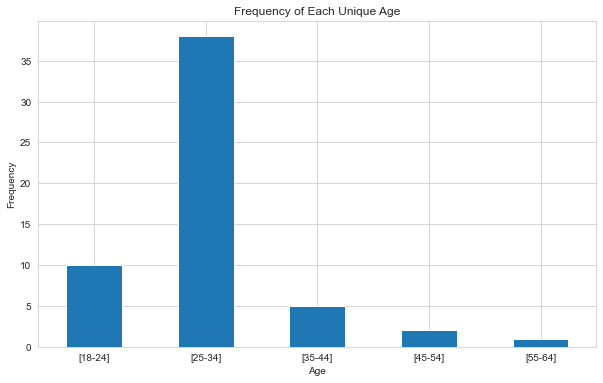

In [177]:
# Sorting index is optional but can make the chart easier to read
age_counts.sort_index(inplace=True)

# Plotting with adjusted size
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust figure size as needed
age_counts.plot(kind='bar', ax=ax)
plt.xticks(rotation=0)

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Frequency of Each Unique Age')

# Remove the legend if not needed
plt.legend().set_visible(False)

# Save the figure with a specified filename and adjust DPI for better resolution
plt.savefig("Frequency_of_Unique_Age.png", dpi=300)

# Display the plot
plt.show()

In [178]:
age_counts

Age
[18-24]    10
[25-34]    38
[35-44]     5
[45-54]     2
[55-64]     1
Name: count, dtype: int64

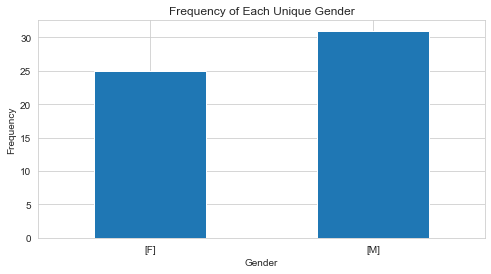

In [179]:
# Sorting index is optional but can make the chart easier to read
gender_counts.sort_index(inplace=True)

# Plotting with adjusted size
fig, ax = plt.subplots(figsize=(8, 4))  # Adjust figure size as needed
gender_counts.plot(kind='bar', ax=ax)
plt.xticks(rotation=0)

plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Frequency of Each Unique Gender')

# Assuming you don't need the legend for a simple gender frequency chart
plt.legend().set_visible(False)

# Save the figure with a specified filename and adjust DPI for better resolution
plt.savefig("Frequency_of_Unique_Gender.png", dpi=300)

# Display the plot
plt.show()





In [180]:
gender_counts

Gender
[F]    25
[M]    31
Name: count, dtype: int64

In [181]:
final_dataframe.columns


Index(['partId', 'id', 'taps', 'start', 'stop', 'appIds0', 'tapsSession',
       'lengthSession', 'timeZone', 'tapDeviceId', 'application', 'category',
       'count_all', 'count_maps', 'prop_map_counts', 'swaps_all', 'swaps_from',
       'swaps_to', 'swaps_map_all', 'prop_swap_maps', 'swaps_from_prop',
       'swaps_to_prop', 'total_time_spent', 'total_time_spent_on_map',
       'proportion_time_on_map', 'SBDS_score', 'Age', 'Gender', 'SA_Score'],
      dtype='object')

In [182]:
final_dataframe

,partId,id,taps,start,stop,appIds0,tapsSession,lengthSession,timeZone,tapDeviceId,...,prop_swap_maps,swaps_from_prop,swaps_to_prop,total_time_spent,total_time_spent_on_map,proportion_time_on_map,SBDS_score,Age,Gender,SA_Score
0,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,018ad520-ce98-11ed-ba2a-dfe7d46df14d,"[2023-03-29 21:49:02.683000, 2023-03-29 21:49:...",1.680119e+12,1.680122e+12,"'4', '4', '6', '6', '23', '23', '23', '4', '6'...",574,2193873,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',...,0.095238,0.047619,0.047619,2193.873,86.243,0.039311,5.13,18-24,M,1.54
1,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,04e18c70-cfa4-11ed-ba2a-dfe7d46df14d,"[2023-03-31 02:01:43.986000, 2023-03-31 02:01:...",1.680221e+12,1.680223e+12,"'6', '6', '6', '4', '4', '6', '6', '6', '6', '...",1616,1826819,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',...,0.222222,0.111111,0.111111,1826.819,4.653,0.002547,5.13,18-24,M,1.54
2,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,04f2a370-cfa4-11ed-ba2a-dfe7d46df14d,"[2023-03-31 02:01:43.986000, 2023-03-31 02:01:...",1.680221e+12,1.680223e+12,"'6', '6', '6', '4', '4', '6', '6', '6', '6', '...",1616,1826819,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',...,0.222222,0.111111,0.111111,1826.819,4.653,0.002547,5.13,18-24,M,1.54
3,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,04fd78e0-cfa4-11ed-ba2a-dfe7d46df14d,"[2023-03-31 02:01:43.986000, 2023-03-31 02:01:...",1.680221e+12,1.680223e+12,"'6', '6', '6', '4', '4', '6', '6', '6', '6', '...",1616,1826819,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',...,0.222222,0.111111,0.111111,1826.819,4.653,0.002547,5.13,18-24,M,1.54
4,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,051edc40-cc72-11ed-ba2a-dfe7d46df14d,"[2023-03-27 09:31:08, 2023-03-27 09:31:08.7130...",1.679902e+12,1.679902e+12,"'4', '4', '20', '20', '20', '20', '20'",7,27638,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',...,1.000000,0.000000,1.000000,27.638,13.515,0.489001,5.13,18-24,M,1.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4321,138e9bf04d3d99d64bed81ad6365356657f628eb,bfe6041f-3f74-42a1-87a3-8ce1f144c8f5,"[2023-06-25 09:47:08.006000, 2023-06-25 09:47:...",1.687679e+12,1.687679e+12,"'13', '13', '13', '13', '13', '13', '13', '13'...",42,26463,'Asia/Karachi','23cdf842-3f63-4bec-bd24-cf229e718c1e',...,1.000000,0.500000,0.500000,26.463,18.766,0.709141,5.53,25-34,M,3.92
4322,138e9bf04d3d99d64bed81ad6365356657f628eb,d24a1676-05dd-4ee7-ab7b-abfbe6e57e5a,"[2023-06-25 09:53:03.122000, 2023-06-25 09:53:...",1.687680e+12,1.687680e+12,"'13', '20', '2', '2'",4,3094,'Asia/Karachi','23cdf842-3f63-4bec-bd24-cf229e718c1e',...,1.000000,0.500000,0.500000,3.094,1.381,0.446348,5.53,25-34,M,3.92
4323,138e9bf04d3d99d64bed81ad6365356657f628eb,f88771f5-8e02-48e1-93bc-7c7fe7b23564,"[2023-06-28 06:32:58.680000, 2023-06-28 06:32:...",1.687927e+12,1.687927e+12,"'2', '2', '2', '2', '2', '2', '2', '20', '20',...",36,52744,'Asia/Karachi','23cdf842-3f63-4bec-bd24-cf229e718c1e',...,1.000000,0.000000,1.000000,52.744,44.741,0.848267,5.53,25-34,M,3.92
4324,138e9bf04d3d99d64bed81ad6365356657f628eb,f8c448f8-734a-4180-a8cc-4cf2bed6adb2,"[2023-06-09 16:47:21.785000, 2023-06-09 16:47:...",1.686322e+12,1.686323e+12,"'3', '3', '4', '4', '4', '4', '2', '2', '2', '...",559,518806,'Asia/Karachi','5eea8028-43e5-46ad-8eed-84cbf65f36fb',...,0.222222,0.111111,0.111111,518.806,30.557,0.058899,5.53,25-34,M,3.92


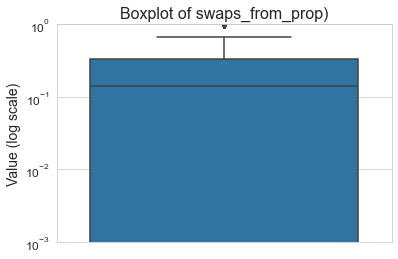

In [183]:
# Create a boxplot
sns.boxplot(y=final_dataframe['swaps_from_prop'])

# Apply a logarithmic scale on the y-axis
plt.yscale('log')

# Set limits for the y-axis; bottom must be >0 for a log scale
# Adjust the bottom and top values as needed for your specific data
plt.ylim(bottom= 0.001, top=1)

# Add a title and adjust the font size
plt.title('Boxplot of swaps_from_prop', fontsize=16)

# Since we're plotting only one variable, we can omit the x-axis label
plt.xlabel('')

# Label the y-axis and adjust the font size
plt.ylabel('Value (log scale)', fontsize=14)

# Adjust font sizes for tick labels (might not be necessary for one variable)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.savefig('swaps_from_prop_boxplot_.png', dpi=300)

plt.show()


In [46]:

# Assuming final_dataframe is your main DataFrame
numeric_cols = final_dataframe.select_dtypes(include=[np.number]).columns.tolist()
numeric_df = final_dataframe[numeric_cols]
numeric_df = numeric_df.drop(['start', 'stop'], axis=1)



In [47]:
# Melting the DataFrame
melted_df = pd.melt(numeric_df, var_name='Variable', value_name='Value')


/var/folders/g9/kvjj1vsj5vldmynmr3nz9s8h0000gn/T/ipykernel_36813/3248767777.py:15: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom = 0)  # Adjust the bottom limit appropriately for log scale


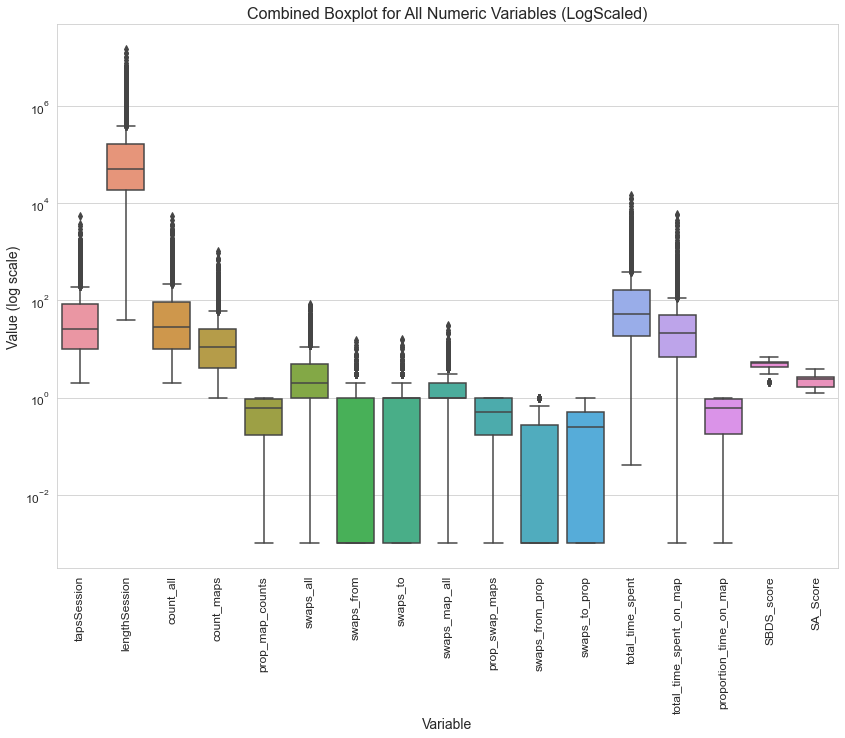

In [305]:
# Assuming melted_df is already defined and contains the 'Value' column you're interested in

# Step 1: Transform values less than 0.001 to zero
threshold = 0.01
melted_df['Value'] = melted_df['Value'].apply(lambda x: x if x >= threshold else 0)

# Step 2: Offset zero values for logarithmic transformation
offset = 1e-3  # Adding a very small positive constant
melted_df['AdjustedValue'] = melted_df['Value'] + offset

# Plot the data with adjusted values
plt.figure(figsize=(14, 10))
sns.boxplot(x='Variable', y='AdjustedValue', data=melted_df)
plt.yscale('log')
plt.ylim(bottom = 0)  # Adjust the bottom limit appropriately for log scale

# Improving plot aesthetics
plt.title('Combined Boxplot for All Numeric Variables (LogScaled)', fontsize=16)
plt.xlabel('Variable', fontsize=14)
plt.ylabel('Value (log scale)', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

# Show and save the plot
plt.savefig('combined_boxplot_adjusted.png', dpi=600)
plt.show()


In [184]:
final_dataframe['swaps_from_prop']

0       0.047619
1       0.111111
2       0.111111
3       0.111111
4       0.000000
          ...   
4321    0.500000
4322    0.500000
4323    0.000000
4324    0.111111
4325    0.333333
Name: swaps_from_prop, Length: 4326, dtype: float64

In [312]:
# List of selected columns for which to calculate skewness
selected_columns = [
    'count_all', 'count_maps', 'prop_map_counts', 'swaps_all', 'swaps_from',
    'swaps_to', 'swaps_map_all', 'prop_swap_maps', 'swaps_from_prop',
    'swaps_to_prop', 'total_time_spent', 'total_time_spent_on_map',
    'proportion_time_on_map',
]



# Calculate and print skewness for the selected columns
for column in selected_columns:
    skewness = final_dataframe[column].skew()
    print(f"Skewness for {column}: {skewness}")
# My data are strongly skewed to the right


Skewness for count_all: 7.056243134300748
Skewness for count_maps: 8.327707774545747
Skewness for prop_map_counts: -0.16602797101606512
Skewness for swaps_all: 4.585782150862301
Skewness for swaps_from: 3.9644242498363766
Skewness for swaps_to: 4.080521559818847
Skewness for swaps_map_all: 4.822729203895475
Skewness for prop_swap_maps: -0.13920224304814863
Skewness for swaps_from_prop: 1.4951632816590064
Skewness for swaps_to_prop: 0.5443282743151545
Skewness for total_time_spent: 8.727785392675164
Skewness for total_time_spent_on_map: 14.546220753685107
Skewness for proportion_time_on_map: -0.19741017189998836


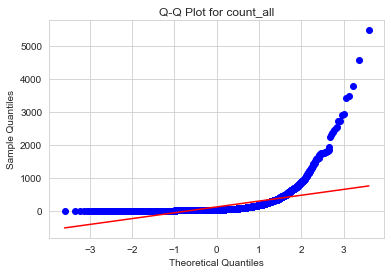

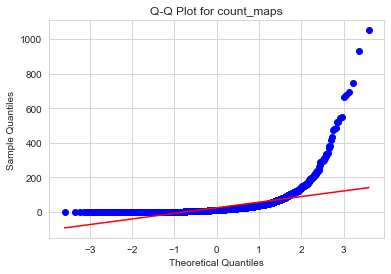

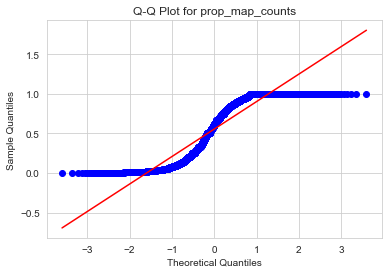

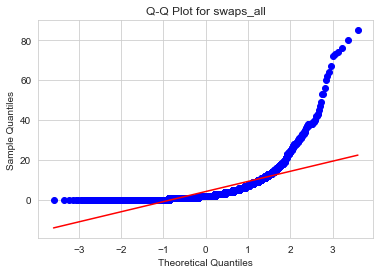

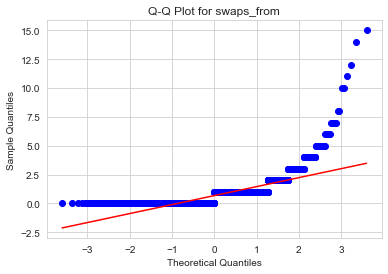

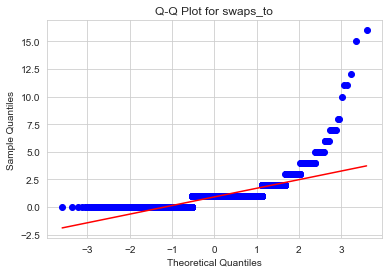

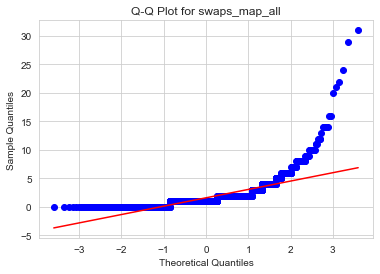

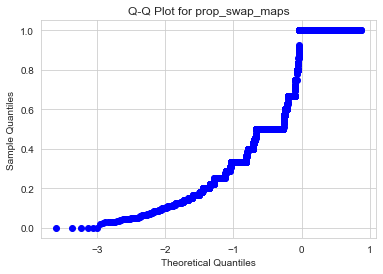

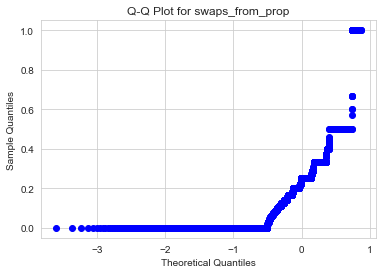

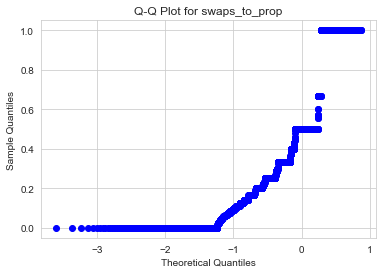

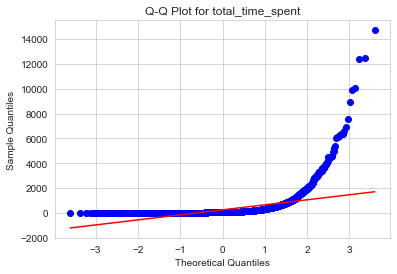

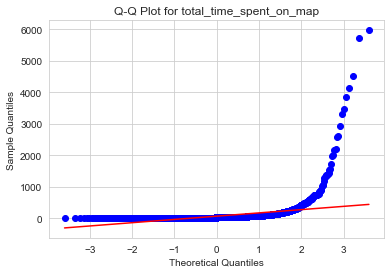

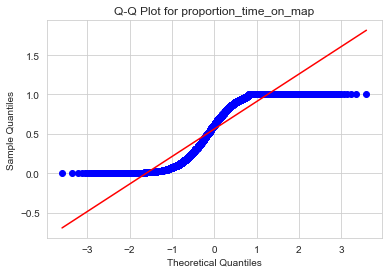

In [313]:
# Generate and display Q-Q plots for the selected columns
for column in selected_columns:
    # Generate Q-Q plot for the current column
    stats.probplot(final_dataframe[column], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for {column}")
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    
    # Show the plot
    plt.show()

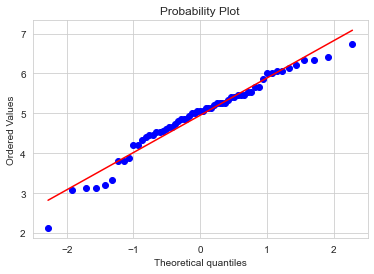

In [314]:
stats.probplot(data_SBSD['SBDS_score'], dist="norm", plot=plt)
plt.show()

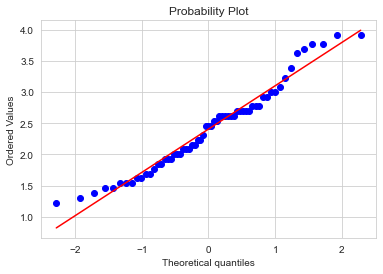

In [315]:
stats.probplot(data_SA['SA_Score'], dist="norm", plot=plt)
plt.show()

In [55]:
# Perform the Shapiro-Wilk test
shapiro_test = stats.shapiro(data_SBSD['SBDS_score'])
# The Shapiro-Wilk test returns a tuple containing the test statistic and the p-value
test_statistic, p_value = shapiro_test

print(f"Test Statistic: {test_statistic}, P-Value: {p_value}")

# Interpret the results
if p_value > 0.05:
    print("The data is normally distributed (fail to reject H0).")
else:
    print("The data is not normally distributed (reject H0).")

Test Statistic: 0.9631814360618591, P-Value: 0.06356319785118103
The data is normally distributed (fail to reject H0).


In [316]:
# Perform the Shapiro-Wilk test
shapiro_test = stats.shapiro(data_SA['SA_Score'])
# The Shapiro-Wilk test returns a tuple containing the test statistic and the p-value
test_statistic, p_value = shapiro_test

print(f"Test Statistic: {test_statistic}, P-Value: {p_value}")

# Interpret the results
if p_value > 0.05:
    print("The data is normally distributed (fail to reject H0).")
else:
    print("The data is not normally distributed (reject H0).")

Test Statistic: 0.960955798625946, P-Value: 0.049250684678554535
The data is not normally distributed (reject H0).


In [324]:
final_dataframe.columns

Index(['partId', 'id', 'taps', 'start', 'stop', 'appIds0', 'tapsSession',
       'lengthSession', 'timeZone', 'tapDeviceId', 'application', 'category',
       'count_all', 'count_maps', 'prop_map_counts', 'swaps_all', 'swaps_from',
       'swaps_to', 'swaps_map_all', 'prop_swap_maps', 'swaps_from_prop',
       'swaps_to_prop', 'total_time_spent', 'total_time_spent_on_map',
       'proportion_time_on_map', 'SBDS_score', 'Age', 'Gender', 'SA_Score'],
      dtype='object')

In [325]:
# Example of aggregating data by an assumed 'participant_id' column first
# Replace 'participant_id' with your actual participant identifier column
participant_aggregates = final_dataframe[['swaps_all', 'swaps_from', 'swaps_to',
                                                                    'swaps_map_all', 'prop_swap_maps', 'swaps_from_prop', 'swaps_to_prop',
                                                                    'total_time_spent', 'total_time_spent_on_map', 'proportion_time_on_map',
                                                                    ]]# or use any other relevant aggregation function

# Now calculate descriptive statistics on these participant-level aggregates
averaged_describe = participant_aggregates.describe()





In [326]:
averaged_describe

,swaps_all,swaps_from,swaps_to,swaps_map_all,prop_swap_maps,swaps_from_prop,swaps_to_prop,total_time_spent,total_time_spent_on_map,proportion_time_on_map
count,4326.000000,4326.000000,4326.000000,4326.000000,3489.000000,3489.000000,3489.000000,4326.000000,4326.000000,4326.000000
mean,4.117429,0.683541,0.919787,1.603329,0.644343,0.208566,0.435777,243.478727,63.242645,0.560686
std,6.761406,0.985416,0.975677,1.849687,0.324526,0.248469,0.360985,723.866723,234.125287,0.374368
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.333333,0.000000,0.142857,18.279750,6.861500,0.174852
50%,2.000000,0.000000,1.000000,1.000000,0.583333,0.142857,0.333333,51.244500,21.276000,0.613328
75%,5.000000,1.000000,1.000000,2.000000,1.000000,0.333333,0.666667,164.623250,49.556250,0.947601
max,85.000000,15.000000,16.000000,31.000000,1.000000,1.000000,1.000000,14710.024000,5972.506000,1.000000


In [327]:
# Step 1: Deduplicate SBDS_score within each partId group
# This ensures one score per partId, assuming SBDS_score is the same across a participant's records
unique_scores_sbsd = final_dataframe[['partId', 'SBDS_score']].drop_duplicates()

# Step 2: Calculate descriptive statistics on the unique SBDS_scores
descriptive_stats_sbsd = unique_scores_sbsd['SBDS_score'].describe()


#descriptive_stats_sbsd = descriptive_stats_sbsd.to_

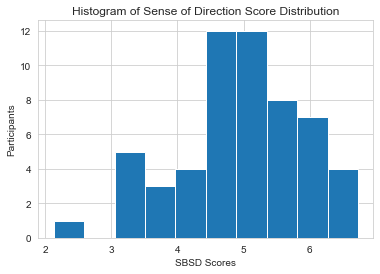

In [328]:

# Create the histogram
unique_scores_sbsd.hist()

# Optional: Customize your plot here
plt.title('Histogram of Sense of Direction Score Distribution')
plt.xlabel('SBSD Scores')
plt.ylabel('Participants')

# Save the histogram to a file
plt.savefig('data_SBSD_histogram.png')

# Optional: Display the plot if you're in a Jupyter notebook or similar environment
plt.show()

In [329]:
# Convert the Series to a DataFrame
descriptive_stats_sbds_df = descriptive_stats_sbsd.to_frame()

# Optionally, give the column a more descriptive name
descriptive_stats_sbds_df.columns = ['SBSD_Score Statistics']

# Display the DataFrame
descriptive_stats_sbds_df



,SBSD_Score Statistics
count,56.000000
mean,4.930714
std,0.966636
min,2.130000
25%,4.470000
50%,5.035000
75%,5.485000
max,6.730000


In [330]:
# This ensures one score per partId, assuming SBDS_score is the same across a participant's records
unique_scores_sa = final_dataframe[['partId', 'SA_Score']].drop_duplicates()

# Step 2: Calculate descriptive statistics on the unique SBDS_scores
descriptive_stats_sa = unique_scores_sa['SA_Score'].describe()
descriptive_stats_sa

# Convert the Series to a DataFrame
descriptive_stats_sa_df = descriptive_stats_sa.to_frame()

# Optionally, give the column a more descriptive name
descriptive_stats_sa_df.columns = ['SA_Score Statistics']

# Display the DataFrame
descriptive_stats_sa_df

,SA_Score Statistics
count,56.000000
mean,2.353214
std,0.629696
min,1.230000
25%,1.902500
50%,2.460000
75%,2.690000
max,3.920000


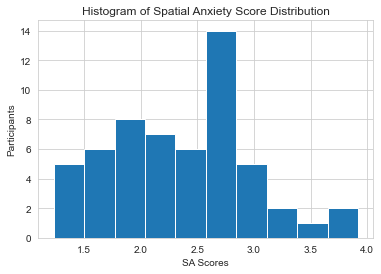

In [331]:
# Create the histogram
unique_scores_sa.hist()

# Optional: Customize your plot here
plt.title('Histogram of Spatial Anxiety Score Distribution')
plt.xlabel('SA Scores')
plt.ylabel('Participants')

# Save the histogram to a file
plt.savefig('data_SA_histogram.png')

# Optional: Display the plot if you're in a Jupyter notebook or similar environment
plt.show()

# STEP 4 : ANALYSES

### Data Distribution and Preprocessing for Correlation Analysis

Our dataset exhibits varied distribution characteristics across different variables:
- **Right-Skewed Variables**: Most of our data are significantly right-skewed. This skewness suggests that a large number of observations are concentrated on the lower end of the scale, with fewer, larger values stretching towards the higher end.
- **Bimodal Distribution**: The variable representing the proportion of time spent on maps uniquely shows a bimodal distribution, indicating two prevalent groups or behaviors within our dataset.
- **Normal Distribution**: The Sense of Direction Score (SBDS) is found to be normally distributed, showcasing a bell-shaped distribution that aligns with statistical expectations for many natural and behavioral phenomena.
- **Light-Tailed Distribution**: The Spatial Ability (SA) scores exhibit a light-tailed distribution, suggesting fewer outliers than expected in a normal distribution and a concentration of values around the mean.

### Strategy for Correlation Analysis

Given the diverse nature of our data distributions, we will adopt a tailored approach to prepare our dataset for correlation analysis:

- **Log Transformation**: To address the right skewness in our data, we will apply a log transformation to the right-skewed variables. This transformation aims to normalize the distribution, making it more symmetrical and suitable for correlation analysis.
- **Normalisation for time and distance**: To address the relativity of measures for distance and time we will normalise from 0-1 based on the max value found for each participant.
- **Handling Bimodal Variables**: We will not apply log transformation to the bimodal variable (proportion of time on maps). Its intrinsic distribution suggests distinct behaviors or groups within our data that a log transformation might obscure.
- **Behavioral Scores**: Both the SBDS and SA scores will be retained in their original form. The normal distribution of SBDS requires no transformation, and the light-tailed nature of SA scores does not warrant adjustment for our correlation purposes.
- **Correlation Method**: Considering the non-parametric characteristics of some of our variables, especially post-transformation, we will employ Spearman's rank correlation coefficient for our analysis. This method does not assume a linear relationship or normality, making it suitable for our diverse dataset.
- **Aggregation of Phone-Related Variables**: For variables related to phone usage, we will aggregate the data by calculating median values. This approach reduces the impact of outliers and provides a robust central tendency measure, further facilitating meaningful correlation analysis.


In [332]:
# Step 1 : Log Trasformed of Right Skewed Variables

import numpy as np

# Assuming tap_data is your initial DataFrame and you've already imported pandas and numpy

# Apply np.log1p to log-transform the variables, excluding 'partId'
log_transformed_columns = ['swaps_all', 'swaps_from', 'swaps_to',
                           'swaps_map_all', 'prop_swap_maps', 'swaps_from_prop', 'swaps_to_prop','count_all', 'count_maps',
                           'total_time_spent', 'total_time_spent_on_map']

# Copy the DataFrame to preserve the original data
log_transformed_df = tap_data.copy()

# Apply the log transformation
log_transformed_df[log_transformed_columns] = np.log1p(tap_data[log_transformed_columns])

log_transformed_df.head()  # Display the first few rows to verify the transformation


,id,taps,start,stop,appIds0,tapsSession,lengthSession,partId,timeZone,tapDeviceId,...,swaps_all,swaps_from,swaps_to,swaps_map_all,prop_swap_maps,swaps_from_prop,swaps_to_prop,total_time_spent,total_time_spent_on_map,proportion_time_on_map
0,018ad520-ce98-11ed-ba2a-dfe7d46df14d,"[2023-03-29 21:49:02.683000, 2023-03-29 21:49:...",1.680119e+12,1.680122e+12,"'4', '4', '6', '6', '23', '23', '23', '4', '6'...",574,2193873,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',...,3.761200,1.098612,1.098612,1.609438,0.090972,0.046520,0.046520,7.693879,4.468697,0.039311
1,04e18c70-cfa4-11ed-ba2a-dfe7d46df14d,"[2023-03-31 02:01:43.986000, 2023-03-31 02:01:...",1.680221e+12,1.680223e+12,"'6', '6', '6', '4', '4', '6', '6', '6', '6', '...",1616,1826819,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',...,2.302585,0.693147,0.693147,1.098612,0.200671,0.105361,0.105361,7.510879,1.732186,0.002547
2,04f2a370-cfa4-11ed-ba2a-dfe7d46df14d,"[2023-03-31 02:01:43.986000, 2023-03-31 02:01:...",1.680221e+12,1.680223e+12,"'6', '6', '6', '4', '4', '6', '6', '6', '6', '...",1616,1826819,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',...,2.302585,0.693147,0.693147,1.098612,0.200671,0.105361,0.105361,7.510879,1.732186,0.002547
3,04fd78e0-cfa4-11ed-ba2a-dfe7d46df14d,"[2023-03-31 02:01:43.986000, 2023-03-31 02:01:...",1.680221e+12,1.680223e+12,"'6', '6', '6', '4', '4', '6', '6', '6', '6', '...",1616,1826819,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',...,2.302585,0.693147,0.693147,1.098612,0.200671,0.105361,0.105361,7.510879,1.732186,0.002547
4,051edc40-cc72-11ed-ba2a-dfe7d46df14d,"[2023-03-27 09:31:08, 2023-03-27 09:31:08.7130...",1.679902e+12,1.679902e+12,"'4', '4', '20', '20', '20', '20', '20'",7,27638,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',...,0.693147,0.000000,0.693147,0.693147,0.693147,0.000000,0.693147,3.354735,2.675183,0.489001


In [333]:
log_transformed_df.columns

Index(['id', 'taps', 'start', 'stop', 'appIds0', 'tapsSession',
       'lengthSession', 'partId', 'timeZone', 'tapDeviceId', 'application',
       'category', 'count_all', 'count_maps', 'prop_map_counts', 'swaps_all',
       'swaps_from', 'swaps_to', 'swaps_map_all', 'prop_swap_maps',
       'swaps_from_prop', 'swaps_to_prop', 'total_time_spent',
       'total_time_spent_on_map', 'proportion_time_on_map'],
      dtype='object')

In [334]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Assuming log_transformed_df is your DataFrame after log transformation
# and log_transformed_columns are the columns you want to Min-Max scale
columns_to_scale = ['swaps_all', 'swaps_from', 'swaps_to',
                           'swaps_map_all','count_all', 'count_maps',
                           'total_time_spent','total_time_spent_on_map','prop_map_counts', 'proportion_time_on_map','prop_swap_maps','swaps_from_prop','swaps_to_prop']
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Function to apply Min-Max scaling to a DataFrame group
def scale_group(group):
    group[columns_to_scale] = scaler.fit_transform(group[columns_to_scale])
    return group

# Group by 'partId' and apply the scaling
scaled_df = log_transformed_df.groupby('partId').apply(scale_group)

# Display the first few rows to verify the updates
scaled_df


id  \
partId                                                                                
138e045f2f3d760c43f98efbae290a72265928eb 3983  9926c4ca-babc-4999-abd5-618fb78cd502   
                                         3984  d2c28552-358f-4ca1-b0bd-a1a264ce5c2a   
138e065decdc4da446ff9ad5657e0eb6528428eb 967   04efdf60-d3f9-11ed-804b-0385126f50c1   
                                         968   054d1511-d56e-11ed-a81a-0125f6e12be1   
                                         969   0fa72281-d258-11ed-ba2a-dfe7d46df14d   
...                                                                             ...   
138efcabcf8b3054400aa5888e32971820de28eb 3724  e84a5643-b778-4dbe-80a1-0172bad48da3   
                                         3725  f2994988-686f-4c16-99c5-5748eb34a521   
                                         3726  f7b3587a-e989-4788-bb00-95f2d7faa980   
                                         3727  fa32f970-0078-4781-bac3-180853a778ee   
                                         3728  fcad973a-8e1f-4f81-bc6f-3174f1401081   

                                                                                            taps  \
partId                                                                                             
138e045f2f3d760c43f98efbae290a72265928eb 3983  [2023-06-11 06:50:52.814000, 2023-06-11 06:50:...   
                                         3984  [2023-06-11 06:48:12.809000, 2023-06-11 06:48:...   
138e065decdc4da446ff9ad5657e0eb6528428eb 967   [2023-04-05 22:39:02.593000, 2023-04-05 22:39:...   
                                         968   [2023-04-07 19:33:04.379000, 2023-04-07 19:33:...   
                                         969   [2023-04-03 21:36:52.494000, 2023-04-03 21:37:...   
...                                                                                          ...   
138efcabcf8b3054400aa5888e32971820de28eb 3724  [2023-06-07 20:18:59.676000, 2023-06-07 20:19:...   
                                         3725  [2023-06-06 21:53:03.683000, 2023-06-06 21:53:...   
                                         3726  [2023-06-03 16:56:00.208000, 2023-06-03 16:56:...   
                                         3727  [2023-06-18 09:19:48.960000, 2023-06-18 09:19:...   
                                         3728  [2023-06-17 17:05:04.663000, 2023-06-17 17:05:...   

                                                      start          stop  \
partId                                                                      
138e045f2f3d760c43f98efbae290a72265928eb 3983  1.686459e+12  1.686459e+12   
                                         3984  1.686459e+12  1.686459e+12   
138e065decdc4da446ff9ad5657e0eb6528428eb 967   1.680727e+12  1.680727e+12   
                                         968   1.680889e+12  1.680890e+12   
                                         969   1.680551e+12  1.680551e+12   
...                                                     ...           ...   
138efcabcf8b3054400aa5888e32971820de28eb 3724  1.686162e+12  1.686162e+12   
                                         3725  1.686081e+12  1.686081e+12   
                                         3726  1.685804e+12  1.685804e+12   
                                         3727  1.687073e+12  1.687074e+12   
                                         3728  1.687014e+12  1.687014e+12   

                                                                                         appIds0  \
partId                                                                                             
138e045f2f3d760c43f98efbae290a72265928eb 3983                                          '51', '4'   
                                         3984  '4', '11', '11', '11', '11', '11', '11', '11',...   
138e065decdc4da446ff9ad5657e0eb6528428eb 967   '8', '8', '8', '6', '6', '6', '6', '6', '6', '...   
                                         968   '2', '2', '6', '6', '6', '6', '6', '6', '6', '...   
                                         969  

In [335]:
scaled_df.columns

Index(['id', 'taps', 'start', 'stop', 'appIds0', 'tapsSession',
       'lengthSession', 'partId', 'timeZone', 'tapDeviceId', 'application',
       'category', 'count_all', 'count_maps', 'prop_map_counts', 'swaps_all',
       'swaps_from', 'swaps_to', 'swaps_map_all', 'prop_swap_maps',
       'swaps_from_prop', 'swaps_to_prop', 'total_time_spent',
       'total_time_spent_on_map', 'proportion_time_on_map'],
      dtype='object')

In [336]:
scaled_df = scaled_df.reset_index(drop=True)

In [337]:
scaled_df

,id,taps,start,stop,appIds0,tapsSession,lengthSession,partId,timeZone,tapDeviceId,...,swaps_all,swaps_from,swaps_to,swaps_map_all,prop_swap_maps,swaps_from_prop,swaps_to_prop,total_time_spent,total_time_spent_on_map,proportion_time_on_map
0,9926c4ca-babc-4999-abd5-618fb78cd502,"[2023-06-11 06:50:52.814000, 2023-06-11 06:50:...",1.686459e+12,1.686459e+12,"'51', '4'",2,1191,138e045f2f3d760c43f98efbae290a72265928eb,'Asia/Karachi','22e8b59d-4b77-4072-ba02-8d06b3eec320',...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
1,d2c28552-358f-4ca1-b0bd-a1a264ce5c2a,"[2023-06-11 06:48:12.809000, 2023-06-11 06:48:...",1.686459e+12,1.686459e+12,"'4', '11', '11', '11', '11', '11', '11', '11',...",156,135535,138e045f2f3d760c43f98efbae290a72265928eb,'Asia/Karachi','22e8b59d-4b77-4072-ba02-8d06b3eec320',...,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
2,04efdf60-d3f9-11ed-804b-0385126f50c1,"[2023-04-05 22:39:02.593000, 2023-04-05 22:39:...",1.680727e+12,1.680727e+12,"'8', '8', '8', '6', '6', '6', '6', '6', '6', '...",182,99181,138e065decdc4da446ff9ad5657e0eb6528428eb,'America/Los_Angeles','98218111-7795-4624-bb20-eba8879e5eb7',...,1.000000,1.000000,1.000000,1.000000,0.819055,0.785404,0.584963,0.549523,0.661991,0.276169
3,054d1511-d56e-11ed-a81a-0125f6e12be1,"[2023-04-07 19:33:04.379000, 2023-04-07 19:33:...",1.680889e+12,1.680890e+12,"'2', '2', '6', '6', '6', '6', '6', '6', '6', '...",20,863494,138e065decdc4da446ff9ad5657e0eb6528428eb,'America/Los_Angeles','98218111-7795-4624-bb20-eba8879e5eb7',...,0.630930,0.500000,0.430677,0.528321,0.488830,0.709511,0.415037,1.000000,0.779886,0.005464
4,0fa72281-d258-11ed-ba2a-dfe7d46df14d,"[2023-04-03 21:36:52.494000, 2023-04-03 21:37:...",1.680551e+12,1.680551e+12,"'2', '4', '4', '4', '4', '4', '4', '6', '6', '...",47,79332,138e065decdc4da446ff9ad5657e0eb6528428eb,'America/Los_Angeles','98218111-7795-4624-bb20-eba8879e5eb7',...,0.500000,0.000000,0.430677,0.333333,0.193433,0.000000,0.584963,0.503368,0.767505,0.628674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4321,e84a5643-b778-4dbe-80a1-0172bad48da3,"[2023-06-07 20:18:59.676000, 2023-06-07 20:19:...",1.686162e+12,1.686162e+12,"'3', '3', '59', '59', '59', '59', '59', '59', ...",29,78016,138efcabcf8b3054400aa5888e32971820de28eb,'Europe/Rome','7670d0bb-b42a-4fe8-8033-3ea6a1851d38',...,0.537244,0.430677,0.430677,0.500000,0.542351,0.321928,0.321928,0.510580,0.221906,0.043107
4322,f2994988-686f-4c16-99c5-5748eb34a521,"[2023-06-06 21:53:03.683000, 2023-06-06 21:53:...",1.686081e+12,1.686081e+12,"'3', '8', '8', '3', '3', '32', '32', '32', '32...",37,57756,138efcabcf8b3054400aa5888e32971820de28eb,'Europe/Rome','7670d0bb-b42a-4fe8-8033-3ea6a1851d38',...,0.598104,0.430677,0.430677,0.500000,0.432596,0.263034,0.263034,0.451812,0.309630,0.117927
4323,f7b3587a-e989-4788-bb00-95f2d7faa980,"[2023-06-03 16:56:00.208000, 2023-06-03 16:56:...",1.685804e+12,1.685804e+12,"'3', '32', '3', '3', '29', '29'",6,53801,138efcabcf8b3054400aa5888e32971820de28eb,'Europe/Rome','7670d0bb-b42a-4fe8-8033-3ea6a1851d38',...,0.462756,0.430677,0.430677,0.500000,0.709960,0.415037,0.415037,0.437989,0.485763,0.448858
4324,fa32f970-0078-4781-bac3-180853a778ee,"[2023-06-18 09:19:48.960000, 2023-06-18 09:19:...",1.687073e+12,1.687074e+12,"'3', '5', '5', '5', '5', '5', '5', '5', '5', '...",849,776409,138efcabcf8b3054400aa5888e32971820de28eb,'Europe/Rome','7670d0bb-b42a-4fe8-8033-3ea6a1851d38',...,0.694135,0.430677,0.430677,0.500000,0.297126,0.192645,0.192645,0.964113,0.490306,0.032095


In [338]:
log_transformed_df_median = scaled_df.groupby('partId')[['prop_map_counts',
       'proportion_time_on_map', 'swaps_all', 'swaps_from', 'swaps_to',
       'swaps_map_all', 'prop_swap_maps', 'swaps_from_prop', 'swaps_to_prop',
       'count_all', 'count_maps', 'total_time_spent',
       'total_time_spent_on_map']].median()

In [339]:
log_transformed_df_median = log_transformed_df_median.reset_index()
log_transformed_df_median

,partId,prop_map_counts,proportion_time_on_map,swaps_all,swaps_from,swaps_to,swaps_map_all,prop_swap_maps,swaps_from_prop,swaps_to_prop,count_all,count_maps,total_time_spent,total_time_spent_on_map
0,138e045f2f3d760c43f98efbae290a72265928eb,0.500000,0.500000,0.500000,0.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,0.500000,0.500000
1,138e065decdc4da446ff9ad5657e0eb6528428eb,0.508497,0.683336,0.500000,0.000000,0.430677,0.333333,0.488830,0.000000,0.584963,0.439813,0.657512,0.420496,0.670154
2,138e07f308e278af4ca4a5c42d93ec77204928eb,0.452311,0.376797,0.255958,0.000000,0.500000,0.356207,1.000000,0.000000,0.868483,0.207092,0.231378,0.388040,0.385494
3,138e0825ddad2b2b4d2b8e9ca20bbab9fec128eb,0.749801,0.684245,0.183169,0.000000,0.500000,0.356207,1.000000,0.000000,1.000000,0.297388,0.305974,0.419261,0.575591
4,138e0a891f880f894e2e99e3bc80fcfac7b428eb,0.227556,0.303409,0.328544,0.270238,0.270238,0.341303,0.567882,0.192645,0.321928,0.440069,0.294079,0.490862,0.492519
5,138e0f6ee02da3074ef4aaccce4b2bf8d45328eb,0.727955,0.548257,0.329695,0.000000,0.500000,0.356207,0.537257,0.131517,0.321928,0.475760,0.540854,0.474807,0.600910
6,138e1d0b283c18c942d08651e3a6a8b08ea728eb,0.087135,0.163230,0.580885,0.386853,0.356207,0.226294,0.285769,0.214596,0.192645,0.561548,0.605557,0.829966,0.567385
7,138e1e0b1a1fb67b4088b18b4f3e9b1d713028eb,0.151090,0.279653,0.386853,0.000000,0.630930,0.000000,0.315616,0.000000,0.321928,0.422214,0.093070,0.300359,0.017134
8,138e1f58870b7d0749f5af2e1c5bf4744f6a28eb,0.561463,0.579732,0.460391,0.500000,1.000000,0.815465,1.000000,0.380182,0.466264,0.496034,0.686482,0.594061,0.878566
9,138e205f835a164442b7ad4051ea1483df7f28eb,0.204019,0.303454,0.425492,0.630930,0.630930,0.792481,0.704113,0.152003,0.415037,0.434356,0.300740,0.446264,0.481189


In [340]:
#data_SA = data_SA.set_index('partId')
#data_SBSD = data_SBSD.set_index('partId')

log_transformed_df_median_copy = log_transformed_df_median.copy()

log_transformed_df_median_copy = log_transformed_df_median_copy.set_index('partId')

final_dataframe_corr = pd.merge(log_transformed_df_median_copy, data_SBSD, on='partId')
final_dataframe_corr = pd.merge(final_dataframe_corr, data_SA, on='partId')


final_dataframe_corr = final_dataframe_corr.reset_index(drop = False)

# Drop the 'gender_x' and 'age_x' columns
final_dataframe_corr = final_dataframe_corr.drop(['Gender_x', 'Age_x'], axis=1)

# Rename 'gender_y' to 'gender' and 'age_y' to 'age'
final_dataframe_corr = final_dataframe_corr.rename(columns={'Gender_y': 'Gender', 'Age_y': 'Age'})

final_dataframe_corr

,partId,prop_map_counts,proportion_time_on_map,swaps_all,swaps_from,swaps_to,swaps_map_all,prop_swap_maps,swaps_from_prop,swaps_to_prop,count_all,count_maps,total_time_spent,total_time_spent_on_map,SBDS_score,Age,Gender,SA_Score
0,138e045f2f3d760c43f98efbae290a72265928eb,0.500000,0.500000,0.500000,0.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,0.500000,0.500000,4.60,25-34,F,3.38
1,138e065decdc4da446ff9ad5657e0eb6528428eb,0.508497,0.683336,0.500000,0.000000,0.430677,0.333333,0.488830,0.000000,0.584963,0.439813,0.657512,0.420496,0.670154,3.80,25-34,F,3.62
2,138e07f308e278af4ca4a5c42d93ec77204928eb,0.452311,0.376797,0.255958,0.000000,0.500000,0.356207,1.000000,0.000000,0.868483,0.207092,0.231378,0.388040,0.385494,4.53,18-24,M,2.69
3,138e0825ddad2b2b4d2b8e9ca20bbab9fec128eb,0.749801,0.684245,0.183169,0.000000,0.500000,0.356207,1.000000,0.000000,1.000000,0.297388,0.305974,0.419261,0.575591,4.53,25-34,M,3.00
4,138e0a891f880f894e2e99e3bc80fcfac7b428eb,0.227556,0.303409,0.328544,0.270238,0.270238,0.341303,0.567882,0.192645,0.321928,0.440069,0.294079,0.490862,0.492519,3.13,25-34,F,3.00
5,138e0f6ee02da3074ef4aaccce4b2bf8d45328eb,0.727955,0.548257,0.329695,0.000000,0.500000,0.356207,0.537257,0.131517,0.321928,0.475760,0.540854,0.474807,0.600910,5.07,18-24,M,1.62
6,138e1d0b283c18c942d08651e3a6a8b08ea728eb,0.087135,0.163230,0.580885,0.386853,0.356207,0.226294,0.285769,0.214596,0.192645,0.561548,0.605557,0.829966,0.567385,5.13,35-44,M,2.46
7,138e1e0b1a1fb67b4088b18b4f3e9b1d713028eb,0.151090,0.279653,0.386853,0.000000,0.630930,0.000000,0.315616,0.000000,0.321928,0.422214,0.093070,0.300359,0.017134,3.80,25-34,M,2.46
8,138e1f58870b7d0749f5af2e1c5bf4744f6a28eb,0.561463,0.579732,0.460391,0.500000,1.000000,0.815465,1.000000,0.380182,0.466264,0.496034,0.686482,0.594061,0.878566,5.27,18-24,F,2.62
9,138e205f835a164442b7ad4051ea1483df7f28eb,0.204019,0.303454,0.425492,0.630930,0.630930,0.792481,0.704113,0.152003,0.415037,0.434356,0.300740,0.446264,0.481189,6.20,25-34,F,2.15


In [341]:
final_dataframe_corr.columns

Index(['partId', 'prop_map_counts', 'proportion_time_on_map', 'swaps_all',
       'swaps_from', 'swaps_to', 'swaps_map_all', 'prop_swap_maps',
       'swaps_from_prop', 'swaps_to_prop', 'count_all', 'count_maps',
       'total_time_spent', 'total_time_spent_on_map', 'SBDS_score', 'Age',
       'Gender', 'SA_Score'],
      dtype='object')

In [342]:


# Assuming 'final_dataframe_corr' is your DataFrame and contains the columns of interest
columns_to_test = [
    'prop_map_counts', 'proportion_time_on_map', 'swaps_all',
    'swaps_from', 'swaps_to', 'swaps_map_all', 'prop_swap_maps',
    'swaps_from_prop', 'swaps_to_prop', 'count_all', 'count_maps',
    'total_time_spent', 'total_time_spent_on_map',
    'SBDS_score', 'SA_Score'
]

# Initialize an empty dictionary to store Shapiro-Wilk test results
shapiro_results = {}

# Perform the Shapiro-Wilk test on each column of 'final_dataframe_corr' and store the results
for column in columns_to_test:
    stat, p_value = shapiro(final_dataframe_corr[column].dropna())  # Drop NaN values as Shapiro cannot handle them
    shapiro_results[column] = {'Statistic': stat, 'p-value': p_value}

# Display the results
for column, results in shapiro_results.items():
    print(f"{column}: Statistic={results['Statistic']}, p-value={results['p-value']}")


prop_map_counts: Statistic=0.9788843393325806, p-value=0.4294950067996979
proportion_time_on_map: Statistic=0.9845057129859924, p-value=0.6868298649787903
swaps_all: Statistic=0.9402451515197754, p-value=0.007956909947097301
swaps_from: Statistic=0.8322056531906128, p-value=1.850705302786082e-06
swaps_to: Statistic=0.8951447010040283, p-value=0.00014837337948847562
swaps_map_all: Statistic=0.8664942979812622, p-value=1.7615118849789724e-05
prop_swap_maps: Statistic=0.8919363021850586, p-value=0.00011533020733622834
swaps_from_prop: Statistic=0.9257162809371948, p-value=0.0020002119708806276
swaps_to_prop: Statistic=0.8854813575744629, p-value=7.02229663147591e-05
count_all: Statistic=0.9818627238273621, p-value=0.5591278672218323
count_maps: Statistic=0.9848348498344421, p-value=0.7029753923416138
total_time_spent: Statistic=0.9546544551849365, p-value=0.034494735300540924
total_time_spent_on_map: Statistic=0.9522911906242371, p-value=0.026955222710967064
SBDS_score: Statistic=0.968123

# OVERALL CORRELATIONS

In [343]:
variables = ['prop_map_counts','swaps_all', 'swaps_from','count_maps','count_all', 'swaps_to', 'swaps_map_all',
       'prop_swap_maps', 'swaps_from_prop', 'swaps_to_prop',
       'total_time_spent', 'total_time_spent_on_map', 'proportion_time_on_map',
       'SBDS_score','SA_Score']

# Initialize DataFrame to store the combined correlation coefficients and p-values
combined_results = pd.DataFrame(index=variables, columns=variables)

# Calculate Spearman R correlation coefficients and p-values, and combine them
for row in variables:
    for col in variables:
        if row == col:
            # Diagonal elements are always 1 for correlation; p-value is not defined (set as '-').
            combined_results.at[row, col] = "1 (-)"
        else:
            corr, p_value = pearsonr(final_dataframe_corr[row], final_dataframe_corr[col])
            # Formatting the string to show both corr and p_value
            combined_results.at[row, col] = f"{corr:.3f} ({p_value:.4f})"

# Print the combined table
print("Combined Pearson Correlation Coefficients and P-values:")
combined_results

# Note: This table is printed in the console. For large datasets, consider alternative visualization methods.

Combined Pearson Correlation Coefficients and P-values:


,prop_map_counts,swaps_all,swaps_from,count_maps,count_all,swaps_to,swaps_map_all,prop_swap_maps,swaps_from_prop,swaps_to_prop,total_time_spent,total_time_spent_on_map,proportion_time_on_map,SBDS_score,SA_Score
prop_map_counts,1 (-),-0.269 (0.0453),-0.358 (0.0067),0.107 (0.4326),-0.333 (0.0121),-0.094 (0.4894),0.026 (0.8508),0.592 (0.0000),-0.049 (0.7208),0.537 (0.0000),-0.269 (0.0452),0.116 (0.3925),0.900 (0.0000),0.035 (0.7984),-0.162 (0.2341)
swaps_all,-0.269 (0.0453),1 (-),0.328 (0.0136),-0.038 (0.7825),0.345 (0.0093),0.164 (0.2260),0.403 (0.0021),-0.376 (0.0043),0.540 (0.0000),-0.134 (0.3236),0.492 (0.0001),0.080 (0.5594),-0.141 (0.3013),-0.029 (0.8306),0.090 (0.5078)
swaps_from,-0.358 (0.0067),0.328 (0.0136),1 (-),0.154 (0.2582),0.206 (0.1272),0.206 (0.1274),0.233 (0.0845),-0.173 (0.2026),0.511 (0.0001),-0.377 (0.0042),0.104 (0.4434),0.058 (0.6693),-0.272 (0.0427),0.081 (0.5544),-0.046 (0.7364)
count_maps,0.107 (0.4326),-0.038 (0.7825),0.154 (0.2582),1 (-),0.288 (0.0312),0.265 (0.0483),-0.124 (0.3634),0.141 (0.3003),-0.124 (0.3611),-0.085 (0.5328),-0.008 (0.9508),0.561 (0.0000),0.139 (0.3084),0.100 (0.4655),-0.224 (0.0970)
count_all,-0.333 (0.0121),0.345 (0.0093),0.206 (0.1272),0.288 (0.0312),1 (-),0.128 (0.3470),0.079 (0.5626),-0.342 (0.0099),0.209 (0.1215),-0.321 (0.0160),0.434 (0.0008),-0.048 (0.7266),-0.313 (0.0189),-0.069 (0.6117),0.124 (0.3620)
swaps_to,-0.094 (0.4894),0.164 (0.2260),0.206 (0.1274),0.265 (0.0483),0.128 (0.3470),1 (-),0.291 (0.0298),0.229 (0.0891),0.033 (0.8066),0.269 (0.0452),-0.020 (0.8838),0.237 (0.0781),-0.163 (0.2299),0.126 (0.3545),-0.187 (0.1673)
swaps_map_all,0.026 (0.8508),0.403 (0.0021),0.233 (0.0845),-0.124 (0.3634),0.079 (0.5626),0.291 (0.0298),1 (-),0.287 (0.0319),0.314 (0.0184),0.277 (0.0390),0.352 (0.0079),0.304 (0.0225),0.022 (0.8724),0.071 (0.6014),0.158 (0.2434)
prop_swap_maps,0.592 (0.0000),-0.376 (0.0043),-0.173 (0.2026),0.141 (0.3003),-0.342 (0.0099),0.229 (0.0891),0.287 (0.0319),1 (-),-0.210 (0.1203),0.681 (0.0000),-0.275 (0.0400),0.302 (0.0236),0.464 (0.0003),0.191 (0.1577),-0.098 (0.4727)
swaps_from_prop,-0.049 (0.7208),0.540 (0.0000),0.511 (0.0001),-0.124 (0.3611),0.209 (0.1215),0.033 (0.8066),0.314 (0.0184),-0.210 (0.1203),1 (-),-0.345 (0.0093),0.198 (0.1433),0.019 (0.8913),-0.004 (0.9787),-0.074 (0.5896),0.014 (0.9157)
swaps_to_prop,0.537 (0.0000),-0.134 (0.3236),-0.377 (0.0042),-0.085 (0.5328),-0.321 (0.0160),0.269 (0.0452),0.277 (0.0390),0.681 (0.0000),-0.345 (0.0093),1 (-),-0.089 (0.5154),0.150 (0.2705),0.491 (0.0001),0.071 (0.6055),0.149 (0.2739)


In [347]:
variables = ['prop_map_counts','swaps_all', 'swaps_from','count_maps','count_all', 'swaps_to', 'swaps_map_all',
       'prop_swap_maps', 'swaps_from_prop', 'swaps_to_prop',
       'total_time_spent', 'total_time_spent_on_map', 'proportion_time_on_map',
       'SBDS_score','SA_Score']

# Initialize DataFrame to store the combined correlation coefficients and p-values
combined_results = pd.DataFrame(index=variables, columns=variables)

# Calculate Spearman R correlation coefficients and p-values, and combine them
for row in variables:
    for col in variables:
        if row == col:
            # Diagonal elements are always 1 for correlation; p-value is not defined (set as '-').
            combined_results.at[row, col] = "1 (-)"
        else:
            corr, p_value = spearmanr(final_dataframe_corr[row], final_dataframe_corr[col])
            # Formatting the string to show both corr and p_value
            combined_results.at[row, col] = f"{corr:.3f} ({p_value:.3f})"

# Print the combined table
print("Combined Spearman Correlation Coefficients and P-values:")
combined_results

# Note: This table is printed in the console. For large datasets, consider alternative visualization methods.

Combined Spearman Correlation Coefficients and P-values:


,prop_map_counts,swaps_all,swaps_from,count_maps,count_all,swaps_to,swaps_map_all,prop_swap_maps,swaps_from_prop,swaps_to_prop,total_time_spent,total_time_spent_on_map,proportion_time_on_map,SBDS_score,SA_Score
prop_map_counts,1 (-),-0.335 (0.012),-0.349 (0.008),0.161 (0.236),-0.378 (0.004),-0.017 (0.902),0.117 (0.390),0.571 (0.000),-0.103 (0.449),0.577 (0.000),-0.229 (0.090),0.068 (0.621),0.873 (0.000),0.002 (0.987),-0.172 (0.206)
swaps_all,-0.335 (0.012),1 (-),0.387 (0.003),-0.028 (0.837),0.348 (0.009),0.166 (0.223),0.306 (0.022),-0.462 (0.000),0.464 (0.000),-0.238 (0.078),0.522 (0.000),0.104 (0.444),-0.199 (0.141),-0.009 (0.949),0.024 (0.861)
swaps_from,-0.349 (0.008),0.387 (0.003),1 (-),0.150 (0.271),0.195 (0.151),0.096 (0.480),0.077 (0.573),-0.185 (0.173),0.542 (0.000),-0.340 (0.010),0.176 (0.196),0.050 (0.713),-0.242 (0.072),0.067 (0.623),-0.016 (0.907)
count_maps,0.161 (0.236),-0.028 (0.837),0.150 (0.271),1 (-),0.299 (0.025),0.177 (0.191),-0.171 (0.207),0.095 (0.485),-0.115 (0.399),-0.079 (0.565),-0.029 (0.834),0.517 (0.000),0.204 (0.132),0.065 (0.634),-0.246 (0.067)
count_all,-0.378 (0.004),0.348 (0.009),0.195 (0.151),0.299 (0.025),1 (-),0.201 (0.137),0.095 (0.485),-0.331 (0.013),0.083 (0.541),-0.277 (0.039),0.497 (0.000),-0.034 (0.805),-0.339 (0.011),-0.087 (0.523),0.167 (0.220)
swaps_to,-0.017 (0.902),0.166 (0.223),0.096 (0.480),0.177 (0.191),0.201 (0.137),1 (-),0.370 (0.005),0.234 (0.082),-0.048 (0.725),0.287 (0.032),0.058 (0.674),0.261 (0.052),-0.091 (0.503),0.089 (0.515),-0.084 (0.537)
swaps_map_all,0.117 (0.390),0.306 (0.022),0.077 (0.573),-0.171 (0.207),0.095 (0.485),0.370 (0.005),1 (-),0.175 (0.198),0.226 (0.094),0.315 (0.018),0.380 (0.004),0.186 (0.169),0.080 (0.557),0.041 (0.764),0.183 (0.176)
prop_swap_maps,0.571 (0.000),-0.462 (0.000),-0.185 (0.173),0.095 (0.485),-0.331 (0.013),0.234 (0.082),0.175 (0.198),1 (-),-0.289 (0.031),0.670 (0.000),-0.278 (0.038),0.183 (0.177),0.428 (0.001),0.166 (0.221),-0.124 (0.363)
swaps_from_prop,-0.103 (0.449),0.464 (0.000),0.542 (0.000),-0.115 (0.399),0.083 (0.541),-0.048 (0.725),0.226 (0.094),-0.289 (0.031),1 (-),-0.313 (0.019),0.289 (0.030),-0.053 (0.698),-0.067 (0.622),-0.003 (0.983),-0.009 (0.949)
swaps_to_prop,0.577 (0.000),-0.238 (0.078),-0.340 (0.010),-0.079 (0.565),-0.277 (0.039),0.287 (0.032),0.315 (0.018),0.670 (0.000),-0.313 (0.019),1 (-),-0.173 (0.202),0.112 (0.410),0.529 (0.000),0.078 (0.567),0.137 (0.313)


/Users/donatellazingaro/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:256: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


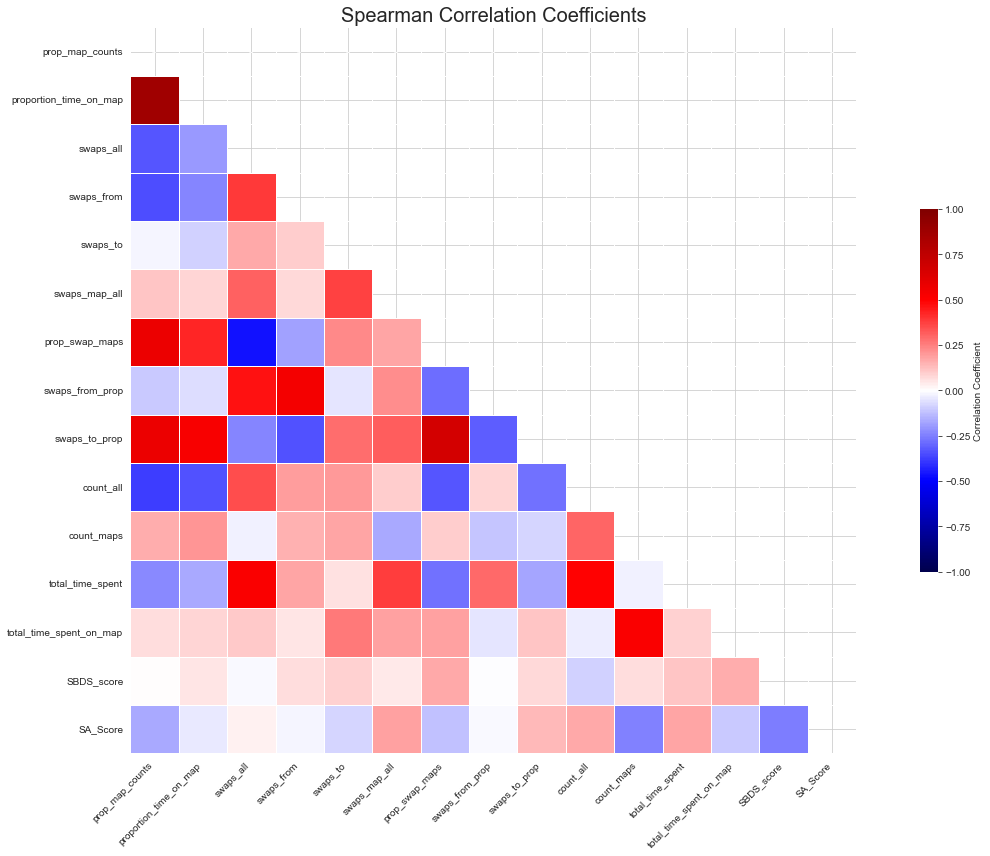

In [348]:

variables =['prop_map_counts', 'proportion_time_on_map', 'swaps_all',
       'swaps_from', 'swaps_to', 'swaps_map_all', 'prop_swap_maps',
       'swaps_from_prop', 'swaps_to_prop', 'count_all', 'count_maps',
       'total_time_spent', 'total_time_spent_on_map',
       'SBDS_score','SA_Score']

# Initialize DataFrame to store the Spearman correlation coefficients
corr_spearman = pd.DataFrame(index=variables, columns=variables)

# Calculate Spearman correlation coefficients
for row in variables:
    for col in variables:
        if row == col:
            # Diagonal elements are always 1 for correlation
            corr_spearman.at[row, col] = 1
        else:
            corr, _ = spearmanr(final_dataframe_corr[row], final_dataframe_corr[col])
            corr_spearman.at[row, col] = corr

# Mask for the upper triangle
mask = np.triu(np.ones_like(corr_spearman, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 12))

# Generate a custom diverging colormap
cmap = "seismic"
# Draw the heatmap for Spearman correlation coefficients
sns.heatmap(corr_spearman.astype(float), mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5, "label": 'Correlation Coefficient'}, 
            annot=True, fmt=".2f", annot_kws={"size": 8})

# Title and layout adjustments
plt.title('Spearman Correlation Coefficients', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x labels for better readability
plt.yticks(fontsize=10)  # Adjust font size of y labels

# Save the figure
plt.tight_layout()  # Adjust the layout to make room for the rotated x-axis labels
plt.savefig('spearman_correlation_coefficients.png', dpi=300, format='png')

# Display the plot
plt.show()


/Users/donatellazingaro/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:256: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


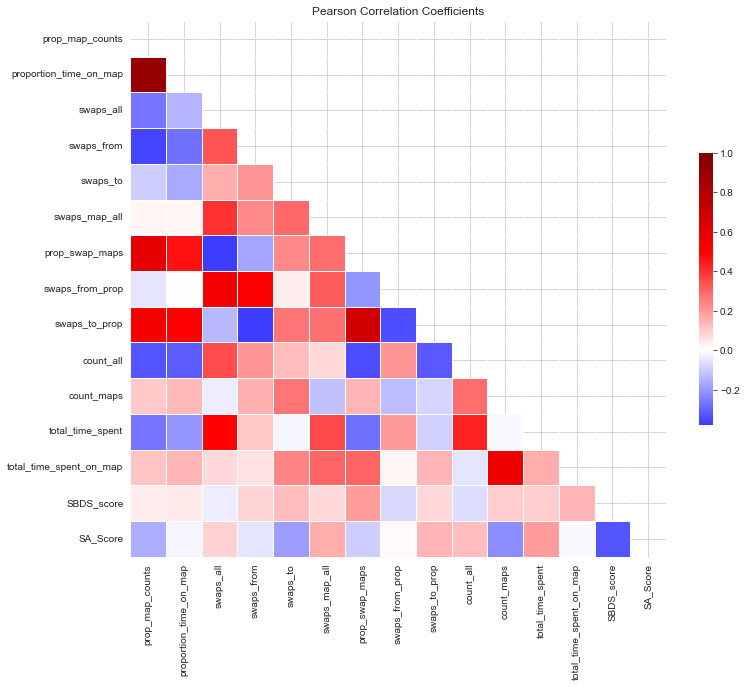

In [349]:

variables =['prop_map_counts', 'proportion_time_on_map', 'swaps_all',
       'swaps_from', 'swaps_to', 'swaps_map_all', 'prop_swap_maps',
       'swaps_from_prop', 'swaps_to_prop', 'count_all', 'count_maps',
       'total_time_spent', 'total_time_spent_on_map',
       'SBDS_score','SA_Score']

# Initialize DataFrame to store the Pearson correlation coefficients
corr_pearson = pd.DataFrame(index=variables, columns=variables)

# Calculate Pearson correlation coefficients
for row in variables:
    for col in variables:
        if row == col:
            # Diagonal elements are always 1 for correlation
            corr_pearson.at[row, col] = 1
        else:
            # Calculate the Pearson correlation coefficient and ignore the p-value
            corr, _ = pearsonr(final_dataframe_corr[row].dropna(), final_dataframe_corr[col].dropna())
            corr_pearson.at[row, col] = corr

# Mask for the upper triangle
mask = np.triu(np.ones_like(corr_pearson, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = "seismic"

# Draw the heatmap for Pearson correlation coefficients
sns.heatmap(corr_pearson.astype(float), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")

plt.title('Pearson Correlation Coefficients')
plt.show()


In [242]:


# Compute Pearson correlation for SBDS_score vs prop_swap_maps
r_sbds_prop_to_swap_maps, p_sbds_prop_to_swap_maps = pearsonr(final_dataframe_corr['SBDS_score'], final_dataframe_corr['prop_map_counts'])

# Print the Pearson correlation coefficient and p-value for SBDS_score vs prop_swap_maps
print(f"SBDS Score vs Proportion Map Count: r = {r_sbds_prop_to_swap_maps:.3f}, p = {p_sbds_prop_to_swap_maps:.3g}")

# Assuming filtered_df_ has 'total_duration' or another variable of interest, replace 'prop_swap_maps' as needed
# Compute Pearson correlation for SBDS_score vs total_duration (or your variable of choice)
# Ensure to replace 'total_duration' with the correct variable name if different
r_sa_prop_to_swap_maps, p_sa_prop_to_swap_maps = pearsonr(final_dataframe_corr['SA_Score'], final_dataframe_corr['prop_map_counts'])

# Print the Pearson correlation coefficient and p-value for SBDS_score vs total_duration
print(f"SA Score vs Proportion Map Count : r = {r_sa_prop_to_swap_maps:.3f}, p = {p_sa_prop_to_swap_maps:.3g}")


SBDS Score vs Proportion Map Count: r = 0.035, p = 0.798
SA Score vs Proportion Map Count : r = -0.162, p = 0.234


In [243]:

# Assuming filtered_df_ is your DataFrame and it's properly defined

# Compute Pearson correlation for SBDS_score vs prop_swap_maps
r_sbds_prop_swap_maps, p_sbds_prop_swap_maps = spearmanr(final_dataframe_corr['SBDS_score'], final_dataframe_corr['swaps_from_prop'])

# Print the Pearson correlation coefficient and p-value for SBDS_score vs prop_swap_maps
print(f"SBDS Score vs prop_swap_maps: r = {r_sbds_prop_swap_maps:.3f}, p = {p_sbds_prop_swap_maps:.3g}")

# Assuming filtered_df_ has 'total_duration' or another variable of interest, replace 'prop_swap_maps' as needed
# Compute Pearson correlation for SBDS_score vs total_duration (or your variable of choice)
# Ensure to replace 'total_duration' with the correct variable name if different
r_sa_prop_swap_maps, p_sa_prop_swap_maps = spearmanr(final_dataframe_corr['SA_Score'], final_dataframe_corr['swaps_from_prop'])

# Print the Pearson correlation coefficient and p-value for SBDS_score vs total_duration
print(f"SA Score vs prop_swap_maps: r = {r_sa_prop_swap_maps:.3f}, p = {p_sa_prop_swap_maps:.3g}")


SBDS Score vs prop_swap_maps: r = -0.003, p = 0.983
SA Score vs prop_swap_maps: r = -0.009, p = 0.949


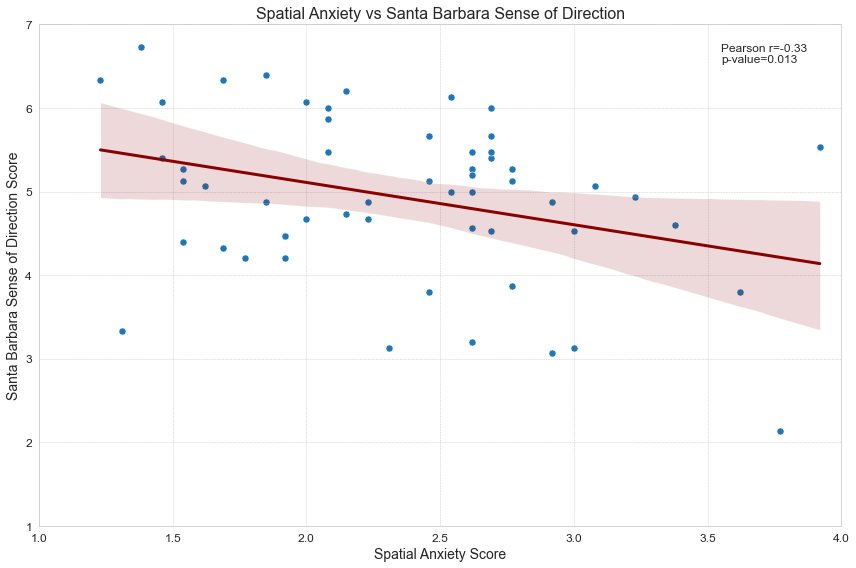

In [350]:
pearson_coef, p_value = pearsonr(final_dataframe_corr['SA_Score'], final_dataframe_corr['SBDS_score'])

external_global_y_min, external_global_y_max = 1, 7  # Example y-axis limits
external_global_x_min, external_global_x_max = 1, 4   # Example x-axis limits


# Improved scatter plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))  # Adjusted figsize for aspect ratio
point_color = '#1f77b4'  # A visually appealing color from the default Matplotlib color cycle

sns.scatterplot(x='SA_Score', y='SBDS_score', data=final_dataframe_corr, ax=ax, color=point_color, s=50)  # Increased marker size
sns.regplot(x='SA_Score', y='SBDS_score', data=final_dataframe_corr, ax=ax, scatter=False, color='darkred', line_kws={"linewidth": 3})  # Enhanced regression line

# Styling the plot
ax.set_ylim([external_global_y_min, external_global_y_max])
ax.set_xlim([external_global_x_min, external_global_x_max])
ax.set_title('Spatial Anxiety vs Santa Barbara Sense of Direction', fontsize=16)
ax.set_xlabel('Spatial Anxiety Score', fontsize=14)
ax.set_ylabel('Santa Barbara Sense of Direction Score', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)  # Added gridlines for readability

# Annotating the plot with the Pearson correlation coefficient
ax.text(0.85, 0.92, f'Pearson r={pearson_coef:.2f}\np-value={p_value:.3f}', 
        transform=ax.transAxes, ha='left', va='bottom', 
        fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()

# Save the plot
plt.savefig('SA_Score_vs_SBDS_Score.png', dpi=600)  # High resolution for better quality

plt.show()


In [91]:
correlation, p_value = pearsonr(final_dataframe_corr['SA_Score'], final_dataframe_corr['SBDS_score'])
correlation, p_value

(-0.32961670722407155, 0.013110640757528805)

In [92]:
r_sa_sbds, p_sa_sbds = pearsonr(final_dataframe_corr['SA_Score'], final_dataframe_corr['SBDS_score'])

# Print the Pearson correlation coefficient and p-value for SBDS_score vs total_duration
print(f"SA Score vs SBSD Score: r = {r_sa_sbds:.3f}, p = {p_sa_sbds:.3g}")

SA Score vs SBSD Score: r = -0.330, p = 0.0131


In [94]:
final_dataframe_corr.columns

Index(['partId', 'prop_map_counts', 'proportion_time_on_map', 'swaps_all',
       'swaps_from', 'swaps_to', 'swaps_map_all', 'prop_swap_maps',
       'swaps_from_prop', 'swaps_to_prop', 'count_all', 'count_maps',
       'total_time_spent', 'total_time_spent_on_map', 'SBDS_score', 'Age',
       'Gender', 'SA_Score'],
      dtype='object')

In [95]:
r_sa_sbds, p_sa_sbds = spearmanr(final_dataframe_corr['SA_Score'], final_dataframe_corr['swaps_from_prop'])

# Print the Pearson correlation coefficient and p-value for SBDS_score vs total_duration
print(f"SA_score vs Swap From Prop: r = {r_sa_sbds:.3f}, p = {p_sa_sbds:.3g}")

SA_score vs Swap From Prop: r = -0.009, p = 0.949


In [96]:
r_sbds_from, p_sbds_from = spearmanr(final_dataframe_corr['SBDS_score'], final_dataframe_corr['swaps_from_prop'])

# Print the Pearson correlation coefficient and p-value for SBDS_score vs total_duration
print(f"SBSD vs Swap From Prop: r = {r_sbds_from:.3f}, p = {p_sbds_from:.3g}")

SBSD vs Swap From Prop: r = -0.003, p = 0.983


In [97]:
r_sa_swaptoprop, p_sa_swaptoprop = pearsonr(final_dataframe_corr['SA_Score'], final_dataframe_corr['swaps_to_prop'])

# Print the Pearson correlation coefficient and p-value for SBDS_score vs total_duration
print(f"SA_score vs Swap To Prop: r = {r_sa_swaptoprop:.3f}, p = {p_sa_swaptoprop:.3g}")

SA_score vs Swap To Prop: r = 0.149, p = 0.274


In [98]:
r_sa_swapall, p_sa_swappall = pearsonr(final_dataframe_corr['SA_Score'], final_dataframe_corr['swaps_all'])
print(f"SA_score vs swaps all: r = {r_sa_swapall:.3f}, p = {p_sa_swappall:.3g}")

SA_score vs swaps all: r = 0.090, p = 0.508


In [99]:
r_sa_swap_map_all, p_sa_swap_map_all = pearsonr(final_dataframe_corr['SA_Score'], final_dataframe_corr['swaps_map_all'])

# Print the Pearson correlation coefficient and p-value for SBDS_score vs total_duration
print(f"SA_score vs Swap To Prop: r = {r_sa_swap_map_all:.3f}, p = {p_sa_swap_map_all:.3g}")

SA_score vs Swap To Prop: r = 0.158, p = 0.243


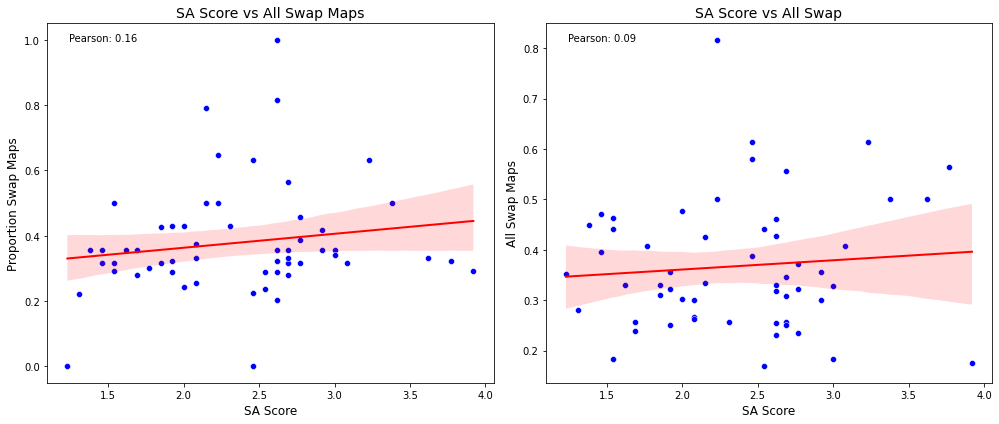

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Create a figure with two subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Consistent color scheme for scatter points
point_color = 'blue'

# Scatter plot for taps_count vs SBDS_score
sns.scatterplot(x='SA_Score', y='swaps_map_all', data=final_dataframe_corr, ax=ax[0], color=point_color)
sns.regplot(x='SA_Score', y='swaps_map_all', data=final_dataframe_corr, ax=ax[0], scatter=False, color='red', line_kws={"linewidth": 2})
ax[0].set_title('SA Score vs All Swap Maps', fontsize=14)
ax[0].set_xlabel('SA Score', fontsize=12)
ax[0].set_ylabel('Proportion Swap Maps', fontsize=12)
ax[0].tick_params(axis='x', labelsize=10)
ax[0].tick_params(axis='y', labelsize=10)

# Calculate Spearman correlation coefficient
spearman_coef, _ = pearsonr(final_dataframe_corr['SA_Score'], final_dataframe_corr['swaps_map_all'])
# Annotate plot with Spearman coefficient
ax[0].annotate(f'Pearson: {spearman_coef:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10, color='black')

# Scatter plot for total_duration vs SBDS_score
sns.scatterplot(x='SA_Score', y='swaps_all', data=final_dataframe_corr, ax=ax[1], color=point_color)
sns.regplot(x='SA_Score', y='swaps_all', data=final_dataframe_corr, ax=ax[1], scatter=False, color='red', line_kws={"linewidth": 2})
ax[1].set_title('SA Score vs All Swap', fontsize=14)
ax[1].set_xlabel('SA Score', fontsize=12)
ax[1].set_ylabel('All Swap Maps', fontsize=12)
ax[1].tick_params(axis='x', labelsize=10)
ax[1].tick_params(axis='y', labelsize=10)

# Calculate Spearman correlation coefficient
spearman_coef, _ = pearsonr(final_dataframe_corr['SA_Score'], final_dataframe_corr['swaps_all'])
# Annotate plot with Spearman coefficient
ax[1].annotate(f'Pearson: {spearman_coef:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10, color='black')

plt.tight_layout()
plt.show()


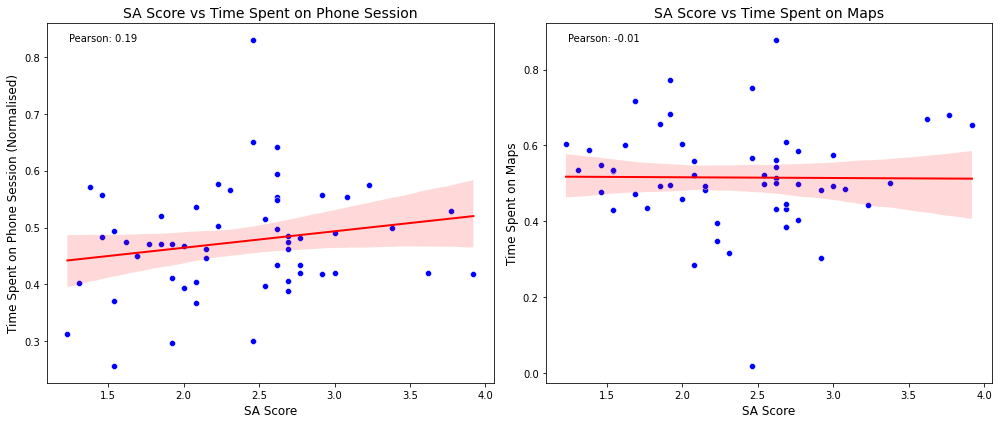

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Create a figure with two subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Consistent color scheme for scatter points
point_color = 'blue'

# Scatter plot for taps_count vs SBDS_score
sns.scatterplot(x='SA_Score', y='total_time_spent', data=final_dataframe_corr, ax=ax[0], color=point_color)
sns.regplot(x='SA_Score', y='total_time_spent', data=final_dataframe_corr, ax=ax[0], scatter=False, color='red', line_kws={"linewidth": 2})
ax[0].set_title('SA Score vs Time Spent on Phone Session', fontsize=14)
ax[0].set_xlabel('SA Score', fontsize=12)
ax[0].set_ylabel('Time Spent on Phone Session (Normalised)', fontsize=12)
ax[0].tick_params(axis='x', labelsize=10)
ax[0].tick_params(axis='y', labelsize=10)

# Calculate Spearman correlation coefficient
spearman_coef, _ = pearsonr(final_dataframe_corr['SA_Score'], final_dataframe_corr['total_time_spent'])
# Annotate plot with Spearman coefficient
ax[0].annotate(f'Pearson: {spearman_coef:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10, color='black')

# Scatter plot for total_duration vs SBDS_score
sns.scatterplot(x='SA_Score', y='total_time_spent_on_map', data=final_dataframe_corr, ax=ax[1], color=point_color)
sns.regplot(x='SA_Score', y='total_time_spent_on_map', data=final_dataframe_corr, ax=ax[1], scatter=False, color='red', line_kws={"linewidth": 2})
ax[1].set_title('SA Score vs Time Spent on Maps', fontsize=14)
ax[1].set_xlabel('SA Score', fontsize=12)
ax[1].set_ylabel('Time Spent on Maps', fontsize=12)
ax[1].tick_params(axis='x', labelsize=10)
ax[1].tick_params(axis='y', labelsize=10)

# Calculate Spearman correlation coefficient
spearman_coef, _ = pearsonr(final_dataframe_corr['SA_Score'], final_dataframe_corr['total_time_spent_on_map'])
# Annotate plot with Spearman coefficient
ax[1].annotate(f'Pearson: {spearman_coef:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10, color='black')

plt.tight_layout()
plt.show()

In [102]:
r_sa_timeall, p_sa_timeall = pearsonr(final_dataframe_corr['SA_Score'], final_dataframe_corr['total_time_spent'])

# Print the Pearson correlation coefficient and p-value for SBDS_score vs total_duration
print(f"SA_score vs Time Spent on a Phone Session: r = {r_sa_timeall:.3f}, p = {p_sa_timeall:.3g}")

SA_score vs Time Spent on a Phone Session: r = 0.191, p = 0.158


In [103]:
r_sa_timemaps, p_sa_timemaps = pearsonr(final_dataframe_corr['SA_Score'], final_dataframe_corr['total_time_spent_on_map'])

# Print the Pearson correlation coefficient and p-value for SBDS_score vs total_duration
print(f"SA_score vs Time Spent on Maps: r = {r_sa_timemaps:.3f}, p = {p_sa_timemaps:.3g}")

SA_score vs Time Spent on Maps: r = -0.009, p = 0.947


# Correlation By Gender 

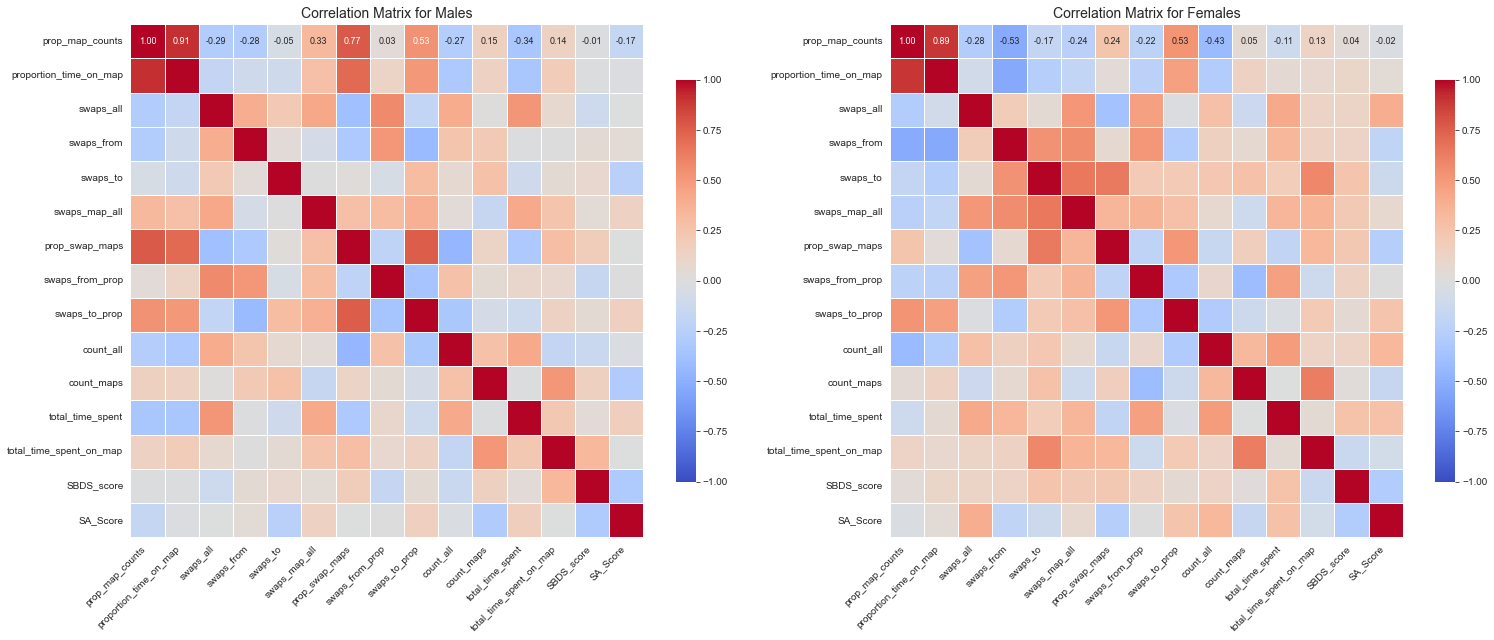

In [245]:
#Pearson Correlation
variables_of_interest = ['prop_map_counts', 'proportion_time_on_map', 'swaps_all',
       'swaps_from', 'swaps_to', 'swaps_map_all', 'prop_swap_maps',
       'swaps_from_prop', 'swaps_to_prop', 'count_all', 'count_maps',
       'total_time_spent', 'total_time_spent_on_map',
       'SBDS_score','SA_Score']

# Split the DataFrame by gender
df_male = final_dataframe_corr[final_dataframe_corr['Gender'] == 'M'][variables_of_interest]
df_female = final_dataframe_corr[final_dataframe_corr['Gender'] == 'F'][variables_of_interest]

# Calculate correlation matrices
corr_matrix_male = df_male.corr(method ='pearson')
corr_matrix_female = df_female.corr(method ='pearson')

plt.figure(figsize=(22, 12))  # Adjust figure size for a better aspect ratio

# Heatmap for Males
plt.subplot(1, 2, 1)
sns.heatmap(corr_matrix_male, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1,
            annot_kws={'size': 9}, cbar_kws={"shrink": .5}, square=True,
            linewidths=0.5, linecolor='white')  # Adjusted line width and color
plt.title('Correlation Matrix for Males Pearson', fontsize=14)
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)

# Heatmap for Females
plt.subplot(1, 2, 2)
sns.heatmap(corr_matrix_female, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1,
            annot_kws={'size': 9}, cbar_kws={"shrink": .5}, square=True,
            linewidths=0.5, linecolor='white')  # Adjusted line width and color
plt.title('Correlation Matrix for Females Pearson', fontsize=14)
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)

plt.tight_layout(pad=3.0)  # Increase padding to ensure heatmaps do not appear squeezed

# Save the figure
plt.savefig('gender_specific_correlation_matrices_optimized_with_spacing.png', dpi=300, format='png', bbox_inches='tight')

plt.show()



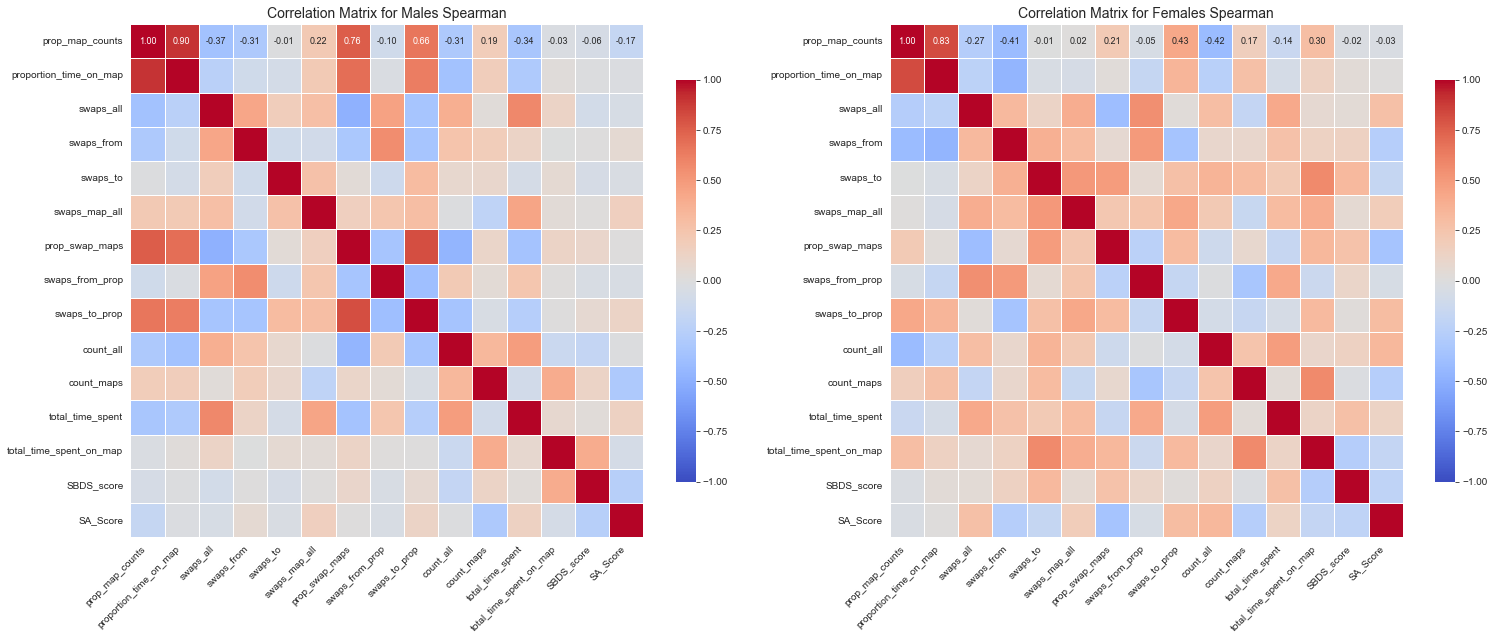

In [351]:
# Spearman Correlation
variables_of_interest = ['prop_map_counts', 'proportion_time_on_map', 'swaps_all',
       'swaps_from', 'swaps_to', 'swaps_map_all', 'prop_swap_maps',
       'swaps_from_prop', 'swaps_to_prop', 'count_all', 'count_maps',
       'total_time_spent', 'total_time_spent_on_map',
       'SBDS_score','SA_Score']

# Split the DataFrame by gender
df_male = final_dataframe_corr[final_dataframe_corr['Gender'] == 'M'][variables_of_interest]
df_female = final_dataframe_corr[final_dataframe_corr['Gender'] == 'F'][variables_of_interest]

# Calculate correlation matrices
corr_matrix_male = df_male.corr(method ='spearman')
corr_matrix_female = df_female.corr(method ='spearman')

plt.figure(figsize=(22, 12))  # Adjust figure size for a better aspect ratio

# Heatmap for Males
plt.subplot(1, 2, 1)
sns.heatmap(corr_matrix_male, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1,
            annot_kws={'size': 9}, cbar_kws={"shrink": .5}, square=True,
            linewidths=0.5, linecolor='white')  # Adjusted line width and color
plt.title('Correlation Matrix for Males Spearman', fontsize=14)
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)

# Heatmap for Females
plt.subplot(1, 2, 2)
sns.heatmap(corr_matrix_female, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1,
            annot_kws={'size': 9}, cbar_kws={"shrink": .5}, square=True,
            linewidths=0.5, linecolor='white')  # Adjusted line width and color
plt.title('Correlation Matrix for Females Spearman', fontsize=14)
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)

plt.tight_layout(pad=3.0)  # Increase padding to ensure heatmaps do not appear squeezed

# Save the figure
plt.savefig('gender_specific_correlation_matrices_optimized_with_spacing_spearman.png', dpi=300, format='png', bbox_inches='tight')

plt.show()



In [352]:
variables = ['prop_map_counts','swaps_all', 'swaps_from','count_maps','count_all', 'swaps_to', 'swaps_map_all',
       'prop_swap_maps', 'swaps_from_prop', 'swaps_to_prop',
       'total_time_spent', 'total_time_spent_on_map', 'proportion_time_on_map',
       'SBDS_score','SA_Score']

# Initialize DataFrame to store the combined correlation coefficients and p-values
combined_results = pd.DataFrame(index=variables, columns=variables)

# Calculate Spearman R correlation coefficients and p-values, and combine them
for row in variables:
    for col in variables:
        if row == col:
            # Diagonal elements are always 1 for correlation; p-value is not defined (set as '-').
            combined_results.at[row, col] = "1 (-)"
        else:
            corr, p_value = spearmanr(df_male[row], df_male[col])
            # Formatting the string to show both corr and p_value
            combined_results.at[row, col] = f"{corr:.3f} ({p_value:.3f})"

# Print the combined table
print("Male Combined Spearman Correlation Coefficients and P-values:")
combined_results

# Note: This table is printed in the console. For large datasets, consider alternative visualization methods.

Male Combined Spearman Correlation Coefficients and P-values:


,prop_map_counts,swaps_all,swaps_from,count_maps,count_all,swaps_to,swaps_map_all,prop_swap_maps,swaps_from_prop,swaps_to_prop,total_time_spent,total_time_spent_on_map,proportion_time_on_map,SBDS_score,SA_Score
prop_map_counts,1 (-),-0.372 (0.039),-0.310 (0.090),0.185 (0.318),-0.311 (0.088),-0.009 (0.962),0.216 (0.244),0.758 (0.000),-0.096 (0.608),0.659 (0.000),-0.340 (0.061),-0.027 (0.885),0.904 (0.000),-0.058 (0.756),-0.168 (0.367)
swaps_all,-0.372 (0.039),1 (-),0.431 (0.015),0.025 (0.893),0.386 (0.032),0.175 (0.347),0.282 (0.125),-0.487 (0.005),0.457 (0.010),-0.348 (0.055),0.578 (0.001),0.120 (0.522),-0.238 (0.197),-0.082 (0.660),-0.053 (0.777)
swaps_from,-0.310 (0.090),0.431 (0.015),1 (-),0.184 (0.323),0.255 (0.166),-0.094 (0.615),-0.092 (0.623),-0.326 (0.074),0.557 (0.001),-0.350 (0.054),0.124 (0.505),-0.001 (0.995),-0.100 (0.592),0.006 (0.973),0.061 (0.744)
count_maps,0.185 (0.318),0.025 (0.893),0.184 (0.323),1 (-),0.329 (0.071),0.092 (0.624),-0.210 (0.257),0.103 (0.581),0.043 (0.817),-0.043 (0.818),-0.087 (0.641),0.400 (0.026),0.175 (0.348),0.123 (0.511),-0.305 (0.095)
count_all,-0.311 (0.088),0.386 (0.032),0.255 (0.166),0.329 (0.071),1 (-),0.085 (0.649),-0.011 (0.953),-0.468 (0.008),0.210 (0.257),-0.352 (0.052),0.481 (0.006),-0.136 (0.466),-0.368 (0.042),-0.172 (0.355),-0.013 (0.947)
swaps_to,-0.009 (0.962),0.175 (0.347),-0.094 (0.615),0.092 (0.624),0.085 (0.649),1 (-),0.268 (0.146),0.038 (0.839),-0.114 (0.540),0.307 (0.093),-0.064 (0.733),0.062 (0.738),-0.074 (0.694),-0.061 (0.746),-0.033 (0.860)
swaps_map_all,0.216 (0.244),0.282 (0.125),-0.092 (0.623),-0.210 (0.257),-0.011 (0.953),0.268 (0.146),1 (-),0.158 (0.397),0.235 (0.203),0.289 (0.114),0.441 (0.013),0.037 (0.842),0.206 (0.266),0.009 (0.962),0.159 (0.392)
prop_swap_maps,0.758 (0.000),-0.487 (0.005),-0.326 (0.074),0.103 (0.581),-0.468 (0.008),0.038 (0.839),0.158 (0.397),1 (-),-0.348 (0.055),0.819 (0.000),-0.367 (0.042),0.124 (0.507),0.689 (0.000),0.097 (0.605),0.003 (0.985)
swaps_from_prop,-0.096 (0.608),0.457 (0.010),0.557 (0.001),0.043 (0.817),0.210 (0.257),-0.114 (0.540),0.235 (0.203),-0.348 (0.055),1 (-),-0.392 (0.029),0.237 (0.199),0.012 (0.949),-0.028 (0.882),-0.042 (0.824),-0.046 (0.805)
swaps_to_prop,0.659 (0.000),-0.348 (0.055),-0.350 (0.054),-0.043 (0.818),-0.352 (0.052),0.307 (0.093),0.289 (0.114),0.819 (0.000),-0.392 (0.029),1 (-),-0.265 (0.149),0.005 (0.977),0.626 (0.000),0.070 (0.708),0.117 (0.530)


In [355]:

variables = ['prop_map_counts','swaps_all', 'swaps_from','count_maps','count_all', 'swaps_to', 'swaps_map_all',
       'prop_swap_maps', 'swaps_from_prop', 'swaps_to_prop',
       'total_time_spent', 'total_time_spent_on_map', 'proportion_time_on_map',
       'SBDS_score','SA_Score']

# Initialize DataFrame to store the combined correlation coefficients and p-values
combined_results = pd.DataFrame(index=variables, columns=variables)

# Calculate Spearman R correlation coefficients and p-values, and combine them
for row in variables:
    for col in variables:
        if row == col:
            # Diagonal elements are always 1 for correlation; p-value is not defined (set as '-').
            combined_results.at[row, col] = "1 (-)"
        else:
            corr, p_value = pearsonr(df_male[row], df_male[col])
            # Formatting the string to show both corr and p_value
            combined_results.at[row, col] = f"{corr:.3f} ({p_value:.3f})"

# Print the combined table
print("Male Combined Pearson Correlation Coefficients and P-values:")
combined_results

# Note: This table is printed in the console. For large datasets, consider alternative visualization methods.

Male Combined Pearson Correlation Coefficients and P-values:


,prop_map_counts,swaps_all,swaps_from,count_maps,count_all,swaps_to,swaps_map_all,prop_swap_maps,swaps_from_prop,swaps_to_prop,total_time_spent,total_time_spent_on_map,proportion_time_on_map,SBDS_score,SA_Score
prop_map_counts,1 (-),-0.288 (0.116),-0.283 (0.123),0.151 (0.417),-0.266 (0.149),-0.052 (0.782),0.325 (0.074),0.771 (0.000),0.035 (0.852),0.532 (0.002),-0.339 (0.062),0.137 (0.463),0.912 (0.000),-0.011 (0.952),-0.171 (0.359)
swaps_all,-0.288 (0.116),1 (-),0.395 (0.028),0.011 (0.951),0.399 (0.026),0.216 (0.242),0.427 (0.017),-0.387 (0.031),0.578 (0.001),-0.184 (0.323),0.521 (0.003),0.073 (0.697),-0.178 (0.337),-0.110 (0.556),-0.002 (0.992)
swaps_from,-0.283 (0.123),0.395 (0.028),1 (-),0.217 (0.240),0.245 (0.185),0.031 (0.867),-0.063 (0.738),-0.319 (0.080),0.514 (0.003),-0.428 (0.016),-0.010 (0.956),0.006 (0.976),-0.108 (0.561),0.053 (0.776),0.039 (0.834)
count_maps,0.151 (0.417),0.011 (0.951),0.217 (0.240),1 (-),0.266 (0.148),0.266 (0.147),-0.160 (0.390),0.123 (0.511),0.051 (0.787),-0.066 (0.725),-0.011 (0.955),0.514 (0.003),0.145 (0.436),0.155 (0.404),-0.290 (0.114)
count_all,-0.266 (0.149),0.399 (0.026),0.245 (0.185),0.266 (0.148),1 (-),0.069 (0.714),0.032 (0.865),-0.449 (0.011),0.268 (0.145),-0.321 (0.078),0.417 (0.019),-0.172 (0.353),-0.319 (0.080),-0.137 (0.462),-0.029 (0.877)
swaps_to,-0.052 (0.782),0.216 (0.242),0.031 (0.867),0.266 (0.147),0.069 (0.714),1 (-),0.002 (0.994),0.022 (0.909),-0.048 (0.796),0.302 (0.098),-0.104 (0.576),0.048 (0.796),-0.106 (0.571),0.079 (0.672),-0.241 (0.191)
swaps_map_all,0.325 (0.074),0.427 (0.017),-0.063 (0.738),-0.160 (0.390),0.032 (0.865),0.002 (0.994),1 (-),0.280 (0.127),0.299 (0.103),0.378 (0.036),0.418 (0.019),0.250 (0.175),0.277 (0.132),0.043 (0.819),0.148 (0.428)
prop_swap_maps,0.771 (0.000),-0.387 (0.031),-0.319 (0.080),0.123 (0.511),-0.449 (0.011),0.022 (0.909),0.280 (0.127),1 (-),-0.209 (0.258),0.764 (0.000),-0.316 (0.083),0.290 (0.114),0.718 (0.000),0.172 (0.354),-0.006 (0.975)
swaps_from_prop,0.035 (0.852),0.578 (0.001),0.514 (0.003),0.051 (0.787),0.268 (0.145),-0.048 (0.796),0.299 (0.103),-0.209 (0.258),1 (-),-0.355 (0.050),0.089 (0.636),0.084 (0.654),0.121 (0.515),-0.161 (0.386),0.007 (0.971)
swaps_to_prop,0.532 (0.002),-0.184 (0.323),-0.428 (0.016),-0.066 (0.725),-0.321 (0.078),0.302 (0.098),0.378 (0.036),0.764 (0.000),-0.355 (0.050),1 (-),-0.111 (0.554),0.142 (0.447),0.506 (0.004),0.048 (0.797),0.158 (0.396)


In [356]:
variables = ['prop_map_counts','swaps_all', 'swaps_from','count_maps','count_all', 'swaps_to', 'swaps_map_all',
       'prop_swap_maps', 'swaps_from_prop', 'swaps_to_prop',
       'total_time_spent', 'total_time_spent_on_map', 'proportion_time_on_map',
       'SBDS_score','SA_Score']

# Initialize DataFrame to store the combined correlation coefficients and p-values
combined_results = pd.DataFrame(index=variables, columns=variables)

# Calculate Spearman R correlation coefficients and p-values, and combine them
for row in variables:
    for col in variables:
        if row == col:
            # Diagonal elements are always 1 for correlation; p-value is not defined (set as '-').
            combined_results.at[row, col] = "1 (-)"
        else:
            corr, p_value = pearsonr(df_female[row], df_female[col])
            # Formatting the string to show both corr and p_value
            combined_results.at[row, col] = f"{corr:.3f} ({p_value:.3f})"

# Print the combined table
print("Female Combined Pearson Correlation Coefficients and P-values:")
combined_results

# Note: This table is printed in the console. For large datasets, consider alternative visualization methods.

Female Combined Pearson Correlation Coefficients and P-values:


,prop_map_counts,swaps_all,swaps_from,count_maps,count_all,swaps_to,swaps_map_all,prop_swap_maps,swaps_from_prop,swaps_to_prop,total_time_spent,total_time_spent_on_map,proportion_time_on_map,SBDS_score,SA_Score
prop_map_counts,1 (-),-0.281 (0.173),-0.527 (0.007),0.054 (0.798),-0.428 (0.033),-0.174 (0.405),-0.236 (0.256),0.245 (0.238),-0.220 (0.290),0.527 (0.007),-0.112 (0.593),0.127 (0.546),0.893 (0.000),0.039 (0.855),-0.024 (0.909)
swaps_all,-0.281 (0.173),1 (-),0.195 (0.351),-0.125 (0.551),0.274 (0.186),0.047 (0.823),0.513 (0.009),-0.370 (0.069),0.465 (0.019),-0.023 (0.915),0.415 (0.039),0.118 (0.574),-0.087 (0.678),0.121 (0.565),0.397 (0.049)
swaps_from,-0.527 (0.007),0.195 (0.351),1 (-),0.069 (0.744),0.151 (0.473),0.534 (0.006),0.556 (0.004),0.070 (0.739),0.511 (0.009),-0.288 (0.163),0.343 (0.094),0.144 (0.491),-0.537 (0.006),0.131 (0.533),-0.199 (0.340)
count_maps,0.054 (0.798),-0.125 (0.551),0.069 (0.744),1 (-),0.322 (0.116),0.269 (0.193),-0.113 (0.591),0.171 (0.413),-0.410 (0.042),-0.123 (0.557),-0.005 (0.982),0.628 (0.001),0.137 (0.514),0.030 (0.885),-0.163 (0.435)
count_all,-0.428 (0.033),0.274 (0.186),0.151 (0.473),0.322 (0.116),1 (-),0.234 (0.260),0.076 (0.719),-0.149 (0.477),0.087 (0.678),-0.295 (0.153),0.489 (0.013),0.128 (0.542),-0.283 (0.171),0.131 (0.532),0.334 (0.103)
swaps_to,-0.174 (0.405),0.047 (0.823),0.534 (0.006),0.269 (0.193),0.234 (0.260),1 (-),0.655 (0.000),0.641 (0.001),0.208 (0.319),0.205 (0.326),0.183 (0.381),0.582 (0.002),-0.264 (0.203),0.257 (0.215),-0.121 (0.563)
swaps_map_all,-0.236 (0.256),0.513 (0.009),0.556 (0.004),-0.113 (0.591),0.076 (0.719),0.655 (0.000),1 (-),0.348 (0.089),0.367 (0.071),0.280 (0.175),0.345 (0.091),0.353 (0.083),-0.187 (0.372),0.217 (0.296),0.073 (0.729)
prop_swap_maps,0.245 (0.238),-0.370 (0.069),0.070 (0.739),0.171 (0.413),-0.149 (0.477),0.641 (0.001),0.348 (0.089),1 (-),-0.209 (0.315),0.509 (0.009),-0.192 (0.357),0.334 (0.103),0.036 (0.864),0.221 (0.288),-0.260 (0.209)
swaps_from_prop,-0.220 (0.290),0.465 (0.019),0.511 (0.009),-0.410 (0.042),0.087 (0.678),0.208 (0.319),0.367 (0.071),-0.209 (0.315),1 (-),-0.315 (0.125),0.463 (0.020),-0.110 (0.602),-0.228 (0.272),0.134 (0.524),0.004 (0.986)
swaps_to_prop,0.527 (0.007),-0.023 (0.915),-0.288 (0.163),-0.123 (0.557),-0.295 (0.153),0.205 (0.326),0.280 (0.175),0.509 (0.009),-0.315 (0.125),1 (-),-0.030 (0.886),0.210 (0.314),0.462 (0.020),0.060 (0.774),0.254 (0.221)


In [357]:
variables = ['prop_map_counts','swaps_all', 'swaps_from','count_maps','count_all', 'swaps_to', 'swaps_map_all',
       'prop_swap_maps', 'swaps_from_prop', 'swaps_to_prop',
       'total_time_spent', 'total_time_spent_on_map', 'proportion_time_on_map',
       'SBDS_score','SA_Score']

# Initialize DataFrame to store the combined correlation coefficients and p-values
combined_results = pd.DataFrame(index=variables, columns=variables)

# Calculate Spearman R correlation coefficients and p-values, and combine them
for row in variables:
    for col in variables:
        if row == col:
            # Diagonal elements are always 1 for correlation; p-value is not defined (set as '-').
            combined_results.at[row, col] = "1 (-)"
        else:
            corr, p_value = spearmanr(df_female[row], df_female[col])
            # Formatting the string to show both corr and p_value
            combined_results.at[row, col] = f"{corr:.3f} ({p_value:.3f})"

# Print the combined table
print("Female Combined Spearmna Correlation Coefficients and P-values:")
combined_results

Female Combined Spearmna Correlation Coefficients and P-values:


,prop_map_counts,swaps_all,swaps_from,count_maps,count_all,swaps_to,swaps_map_all,prop_swap_maps,swaps_from_prop,swaps_to_prop,total_time_spent,total_time_spent_on_map,proportion_time_on_map,SBDS_score,SA_Score
prop_map_counts,1 (-),-0.268 (0.196),-0.415 (0.039),0.168 (0.421),-0.419 (0.037),-0.006 (0.977),0.015 (0.943),0.206 (0.323),-0.051 (0.809),0.429 (0.033),-0.144 (0.493),0.295 (0.152),0.827 (0.000),-0.025 (0.907),-0.035 (0.870)
swaps_all,-0.268 (0.196),1 (-),0.326 (0.112),-0.176 (0.400),0.292 (0.157),0.123 (0.557),0.396 (0.050),-0.402 (0.046),0.551 (0.004),0.025 (0.907),0.418 (0.038),0.069 (0.742),-0.223 (0.284),0.046 (0.828),0.276 (0.182)
swaps_from,-0.415 (0.039),0.326 (0.112),1 (-),0.089 (0.674),0.088 (0.677),0.380 (0.061),0.305 (0.138),0.065 (0.759),0.499 (0.011),-0.359 (0.078),0.273 (0.187),0.134 (0.523),-0.462 (0.020),0.144 (0.492),-0.259 (0.212)
count_maps,0.168 (0.421),-0.176 (0.400),0.089 (0.674),1 (-),0.251 (0.227),0.309 (0.133),-0.150 (0.473),0.084 (0.689),-0.336 (0.100),-0.158 (0.449),0.032 (0.881),0.575 (0.003),0.278 (0.179),-0.018 (0.933),-0.266 (0.199)
count_all,-0.419 (0.037),0.292 (0.157),0.088 (0.677),0.251 (0.227),1 (-),0.356 (0.081),0.217 (0.296),-0.112 (0.594),-0.012 (0.953),-0.075 (0.721),0.484 (0.014),0.102 (0.629),-0.244 (0.240),0.145 (0.489),0.332 (0.105)
swaps_to,-0.006 (0.977),0.123 (0.557),0.380 (0.061),0.309 (0.133),0.356 (0.081),1 (-),0.507 (0.010),0.490 (0.013),0.059 (0.778),0.278 (0.178),0.206 (0.324),0.571 (0.003),-0.040 (0.850),0.325 (0.113),-0.165 (0.429)
swaps_map_all,0.015 (0.943),0.396 (0.050),0.305 (0.138),-0.150 (0.473),0.217 (0.296),0.507 (0.010),1 (-),0.234 (0.261),0.246 (0.236),0.424 (0.034),0.305 (0.138),0.398 (0.049),-0.056 (0.790),0.058 (0.782),0.181 (0.388)
prop_swap_maps,0.206 (0.323),-0.402 (0.046),0.065 (0.759),0.084 (0.689),-0.112 (0.594),0.490 (0.013),0.234 (0.261),1 (-),-0.229 (0.271),0.308 (0.134),-0.161 (0.441),0.332 (0.105),0.030 (0.886),0.260 (0.209),-0.353 (0.083)
swaps_from_prop,-0.051 (0.809),0.551 (0.004),0.499 (0.011),-0.336 (0.100),-0.012 (0.953),0.059 (0.778),0.246 (0.236),-0.229 (0.271),1 (-),-0.166 (0.429),0.421 (0.036),-0.130 (0.537),-0.164 (0.432),0.103 (0.626),-0.053 (0.800)
swaps_to_prop,0.429 (0.033),0.025 (0.907),-0.359 (0.078),-0.158 (0.449),-0.075 (0.721),0.278 (0.178),0.424 (0.034),0.308 (0.134),-0.166 (0.429),1 (-),-0.056 (0.790),0.315 (0.126),0.351 (0.085),0.016 (0.940),0.303 (0.141)


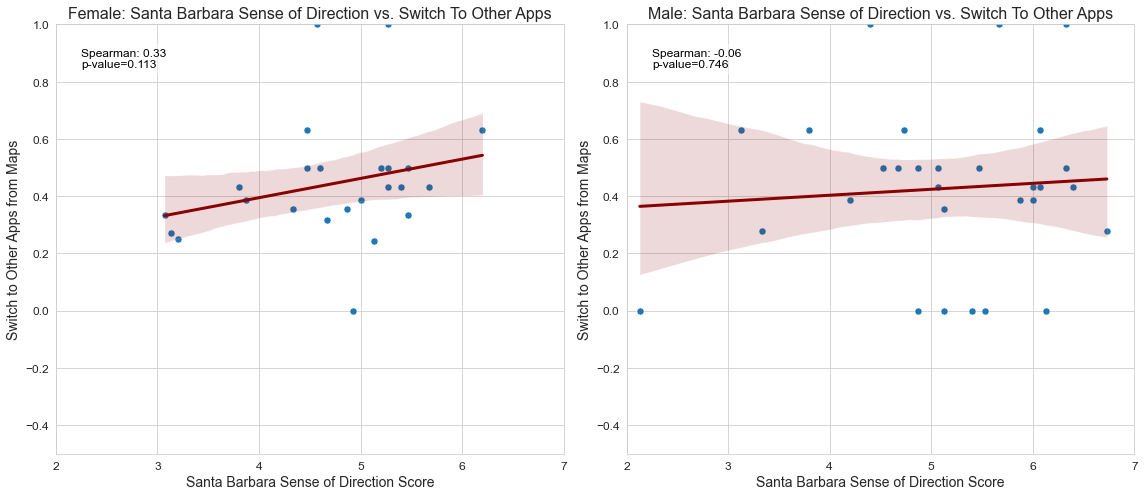

In [358]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
external_global_y_min, external_global_y_max = -.5, 1  # Example y-axis limits
external_global_x_min, external_global_x_max = 2, 7  # Example x-axis limits


# Create a figure with two subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 7))  # Adjusted for better spacing

# Neutral and consistent color scheme for scatter points and regression lines
point_color = '#1f77b4'  # A visually appealing color for points
regression_line_color = 'darkred'  # A visually appealing color for lines

# Scatter plot and regression for female dataset
sns.scatterplot(x='SBDS_score', y='swaps_to', data=df_female, ax=ax[0], color=point_color, s=50)  # Marker size increased for visibility
sns.regplot(x='SBDS_score', y='swaps_to', data=df_female, ax=ax[0], scatter=False, color=regression_line_color, line_kws={"linewidth": 3})
ax[0].set_ylim([external_global_y_min, external_global_y_max])
ax[0].set_xlim([external_global_x_min, external_global_x_max])

# Apply global y-axis limit
ax[0].set_title('Female: Santa Barbara Sense of Direction vs. Switch To Other Apps', fontsize=16)
ax[0].set_xlabel('Santa Barbara Sense of Direction Score', fontsize=14)
ax[0].set_ylabel('Switch to Other Apps from Maps', fontsize=14)
ax[0].tick_params(axis='both', which='major', labelsize=12)

# Calculate and annotate Spearman correlation for female
spearman_coef_female, p_value_female = spearmanr(df_female['SBDS_score'], df_female['swaps_to'])
ax[0].annotate(f'Spearman: {spearman_coef_female:.2f}\np-value={p_value_female:.3f}', xy=(0.05, 0.90), xycoords='axes fraction', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.5))

# Scatter plot and regression for male dataset
sns.scatterplot(x='SBDS_score', y='swaps_to', data=df_male, ax=ax[1], color=point_color, s=50)
sns.regplot(x='SBDS_score', y='swaps_to', data=df_male, ax=ax[1], scatter=False, color=regression_line_color, line_kws={"linewidth": 3})
ax[1].set_ylim([external_global_y_min, external_global_y_max])
ax[1].set_xlim([external_global_x_min, external_global_x_max])

# Apply global y-axis limits
ax[1].set_title('Male: Santa Barbara Sense of Direction vs. Switch To Other Apps', fontsize=16)
ax[1].set_xlabel('Santa Barbara Sense of Direction Score', fontsize=14)
ax[1].set_ylabel('Switch to Other Apps from Maps', fontsize=14)
ax[1].tick_params(axis='both', which='major', labelsize=12)

# Calculate and annotate Spearman correlation for male
spearman_coef_male, p_value_male = spearmanr(df_male['SBDS_score'], df_male['swaps_to'])
ax[1].annotate(f'Spearman: {spearman_coef_male:.2f}\np-value={p_value_male:.3f}', xy=(0.05, 0.90), xycoords='axes fraction', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()

# Save the plot with a neutral filename
plt.savefig('SBDS_Score_vs_Swaps_to_Gender.png', dpi=600)  # High resolution for better quality

plt.show()


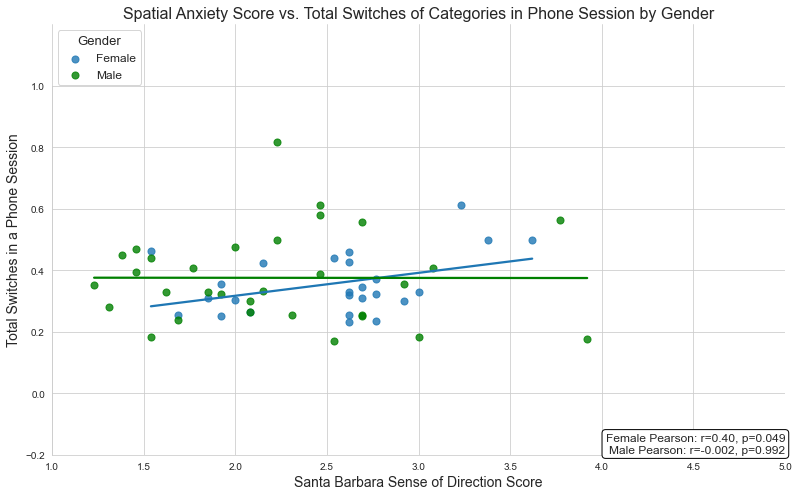

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import spearmanr


external_global_y_min, external_global_y_max = -.2, 1.2  # Example y-axis limits
external_global_x_min, external_global_x_max = 1, 5  # Example x-axis limits

# Assuming 'df_female' and 'df_male' are already defined and have a 'Gender' column added
df_female['Gender'] = 'Female'
df_male['Gender'] = 'Male'

# Combine into a single DataFrame
df_combined = pd.concat([df_female, df_male])

# Calculate Spearman correlation for each gender
corr_female, pval_female = pearsonr(df_female['SA_Score'], df_female['swaps_all'])
corr_male, pval_male = pearsonr(df_male['SA_Score'], df_male['swaps_all'])

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot using seaborn's lmplot for regression lines + scatter plots
g = sns.lmplot(x='SA_Score', y='swaps_all', hue='Gender', data=df_combined, 
               palette={'Female': '#1f77b4', 'Male': 'green'}, 
               aspect=1.6, legend=False, scatter_kws={'s': 50}, ci=None, height=7)

# Adjust the axes limits based on external globals
plt.ylim(external_global_y_min, external_global_y_max)
plt.xlim(external_global_x_min, external_global_x_max)

# Titles and labels
plt.title('Spatial Anxiety Score vs. Total Switches of Categories in Phone Session by Gender', fontsize=16)
plt.xlabel('Santa Barbara Sense of Direction Score', fontsize=14)
plt.ylabel('Total Switches in a Phone Session', fontsize=14)

# Annotations with Spearman correlation for female and male datasets
plt.text(external_global_x_max, external_global_y_min, 
         f"Female Pearson: r={corr_female:.2f}, p={pval_female:.3f}\n"
         f"Male Pearson: r={corr_male:.3f}, p={pval_male:.3f}", 
         horizontalalignment='right', verticalalignment='bottom', fontsize=12, 
         bbox=dict(boxstyle="round", facecolor='white', edgecolor='black'))

# Adding a legend manually
plt.legend(title='Gender', title_fontsize='13', fontsize='12', loc='upper left')

# Enhancing the plot
sns.despine(trim=True)
plt.tight_layout()

# Save the plot
plt.savefig('SA_Score_vs_total_switches.png', dpi=600)

plt.show()


In [112]:
r_sa_swap_to_male, p_sa_swap_to_male = spearmanr(df_male['SA_Score'], df_male['prop_swap_maps'])

# Print the Pearson correlation coefficient and p-value for SBDS_score vs total_duration
print(f"SBDS core Male vs Proportion of Swap To: r = {r_sa_swap_to_male:.3f}, p = {p_sa_swap_to_male:.3g}")

SBDS core Male vs Proportion of Swap To: r = 0.003, p = 0.985


In [113]:
r_sa_swap_to_female, p_sa_swap_to_female = spearmanr(df_female['SA_Score'], df_female['swaps_from_prop'])

# Print the Pearson correlation coefficient and p-value for SBDS_score vs total_duration
print(f"SBDS Female vs Proportion of Swap To : r = {r_sa_swap_to_female:.3f}, p = {p_sa_swap_to_female:.3g}")

SBDS Female vs Proportion of Swap To : r = -0.053, p = 0.8


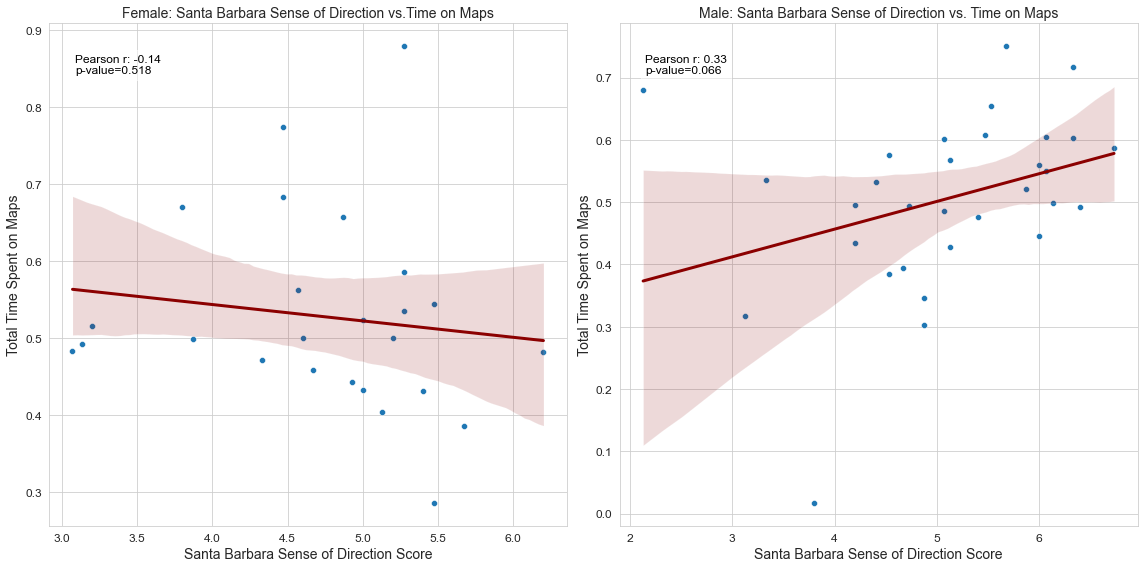

In [207]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Create a figure with two subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Consistent color scheme for scatter points and dark orange for regression lines
point_color = '#1f77b4'  # Using a blueish color from matplotlib's default cycle
regression_line_color = 'darkred'  # Dark orange for the regression line

# Scatter plot for SBDS_score vs total_time_spent_on_map (Female)
sns.scatterplot(x='SBDS_score', y='total_time_spent_on_map', data=df_female, ax=ax[0], color=point_color)
sns.regplot(x='SBDS_score', y='total_time_spent_on_map', data=df_female, ax=ax[0], scatter=False, color=regression_line_color, line_kws={"linewidth": 3})
ax[0].set_title('Female: Santa Barbara Sense of Direction vs.Time on Maps', fontsize=14)
ax[0].set_xlabel('Santa Barbara Sense of Direction Score', fontsize=14)
ax[0].set_ylabel('Total Time Spent on Maps', fontsize=14)
ax[0].tick_params(axis='both', which='major', labelsize=12)

# ax[0].tick_params(axis='x', labelsize=10)
# ax[0].tick_params(axis='y', labelsize=10)

# Calculate Spearman correlation coefficient for Female
spearman_coef_female, p_value_fem = pearsonr(df_female['SBDS_score'], df_female['total_time_spent_on_map'])
# Annotate plot with Spearman coefficient for Female
ax[0].annotate(f'Pearson r: {spearman_coef_female:.2f}\np-value={p_value_fem:.3f}', xy=(0.05, 0.90), xycoords='axes fraction', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.5))

# Scatter plot for SBDS_score vs total_time_spent_on_map (Male)
sns.scatterplot(x='SBDS_score', y='total_time_spent_on_map', data=df_male, ax=ax[1], color=point_color)
sns.regplot(x='SBDS_score', y='total_time_spent_on_map', data=df_male, ax=ax[1], scatter=False, color=regression_line_color, line_kws={"linewidth": 3})
ax[1].set_title('Male: Santa Barbara Sense of Direction vs. Time on Maps', fontsize=14)
ax[1].set_xlabel('Santa Barbara Sense of Direction Score', fontsize=14)
ax[1].set_ylabel('Total Time Spent on Maps', fontsize=14)
ax[1].tick_params(axis='both', which='major', labelsize=12)

#ax[1].tick_params(axis='x', labelsize=10)
#ax[1].tick_params(axis='y', labelsize=12)

# Calculate Spearman correlation coefficient for Male
spearman_coef_male, p_value_mal = pearsonr(df_male['SBDS_score'], df_male['total_time_spent_on_map'])
# Annotate plot with Spearman coefficient for Male
ax[1].annotate(f'Pearson r: {spearman_coef_male:.2f}\np-value={p_value_mal:.3f}', xy=(0.05, 0.90), xycoords='axes fraction', fontsize=12, color='black',bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()

# Save the plot with high resolution
plt.savefig('SBDS_Score_vs_Time_on_Maps_by_Gender.png', dpi=600)

plt.show()


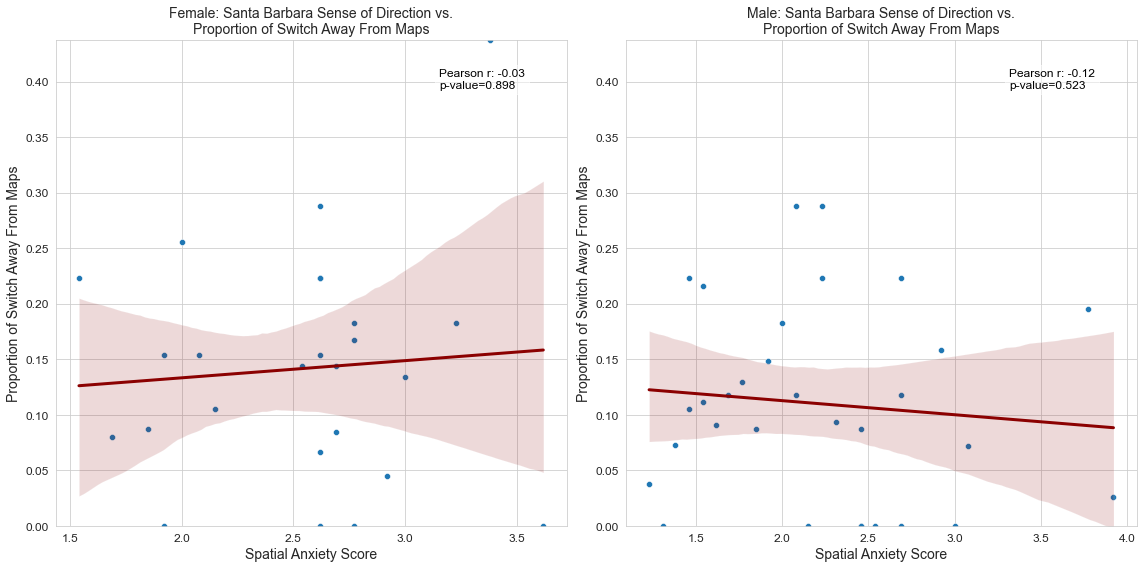

In [208]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Determine global y-axis limits based on 'swaps_from_prop' for both datasets
global_min = min(df_female['swaps_from_prop'].min(), df_male['swaps_from_prop'].min())
global_max = max(df_female['swaps_from_prop'].max(), df_male['swaps_from_prop'].max())

# Create a figure with two subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Consistent color scheme for scatter points and dark orange for regression lines
point_color = '#1f77b4'  # Using a blueish color from matplotlib's default cycle
regression_line_color = 'darkred'  # Dark orange for the regression line

# Scatter plot for SBDS_score vs total_time_spent_on_map (Female)
sns.scatterplot(x='SA_Score', y='swaps_from_prop', data=df_female, ax=ax[0], color=point_color)
sns.regplot(x='SA_Score', y='swaps_from_prop', data=df_female, ax=ax[0], scatter=False, color=regression_line_color, line_kws={"linewidth": 3})
ax[0].set_ylim([global_min, global_max])  # Apply global y-axis limits
ax[0].set_title(r"Female: Santa Barbara Sense of Direction vs." +"\n" + "Proportion of Switch Away From Maps", fontsize=14)
ax[0].set_xlabel('Spatial Anxiety Score', fontsize=14)
ax[0].set_ylabel('Proportion of Switch Away From Maps', fontsize=14)
ax[0].tick_params(axis='both', which='major', labelsize=12)

# ax[0].tick_params(axis='x', labelsize=10)
# ax[0].tick_params(axis='y', labelsize=10)

# Calculate Spearman correlation coefficient for Female
spearman_coef_female, p_value_fem = spearmanr(df_female['SA_Score'], df_female['swaps_from_prop'])
# Annotate plot with Spearman coefficient for Female
ax[0].annotate(f'Pearson r: {spearman_coef_female:.2f}\np-value={p_value_fem:.3f}', xy=(0.75, 0.90), xycoords='axes fraction', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.5))

# Scatter plot for SBDS_score vs total_time_spent_on_map (Male)
sns.scatterplot(x='SA_Score', y='swaps_from_prop', data=df_male, ax=ax[1], color=point_color)
sns.regplot(x='SA_Score', y='swaps_from_prop', data=df_male, ax=ax[1], scatter=False, color=regression_line_color, line_kws={"linewidth": 3})
ax[1].set_ylim([global_min, global_max])  # Apply global y-axis limits

ax[1].set_title(r"Male: Santa Barbara Sense of Direction vs." + "\n" + "Proportion of Switch Away From Maps", fontsize=14)
ax[1].set_xlabel('Spatial Anxiety Score', fontsize=14)
ax[1].set_ylabel('Proportion of Switch Away From Maps', fontsize=14)
ax[1].tick_params(axis='both', which='major', labelsize=12)

#ax[1].tick_params(axis='x', labelsize=10)
#ax[1].tick_params(axis='y', labelsize=12)

# Calculate Spearman correlation coefficient for Male
spearman_coef_male, p_value_mal = spearmanr(df_male['SA_Score'], df_male['swaps_from_prop'])
# Annotate plot with Spearman coefficient for Male
ax[1].annotate(f'Pearson r: {spearman_coef_male:.2f}\np-value={p_value_mal:.3f}', xy=(0.75, 0.90), xycoords='axes fraction', fontsize=12, color='black',bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()

# Save the plot with high resolution
plt.savefig('SBDS_Score_vs_Swaps_proportion_gender.png', dpi=600)

plt.show()


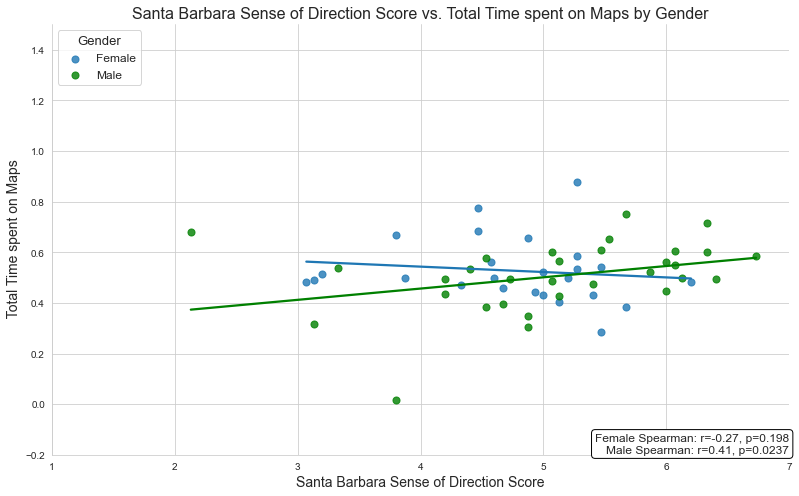

In [286]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import spearmanr

external_global_y_min, external_global_y_max = -.2, 1.5  # Example y-axis limits
external_global_x_min, external_global_x_max = 1, 7  # Example x-axis limits

# Assuming 'df_female' and 'df_male' already defined and have a 'Gender' column added
df_female['Gender'] = 'Female'
df_male['Gender'] = 'Male'

# Combine into a single DataFrame for easier plotting
df_combined = pd.concat([df_female, df_male])

# Calculate Spearman correlation for each gender for SA_Score and swaps_from_prop
corr_female, pval_female = spearmanr(df_female['SBDS_score'], df_female['total_time_spent_on_map'])
corr_male, pval_male = spearmanr(df_male['SBDS_score'], df_male['total_time_spent_on_map'])

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot using seaborn's lmplot for regression lines + scatter plots
g = sns.lmplot(x='SBDS_score', y='total_time_spent_on_map', hue='Gender', data=df_combined, 
               palette={'Female': '#1f77b4', 'Male': 'green'}, 
               aspect=1.6, legend=False, scatter_kws={'s': 50}, ci=None, height=7)

# Define global limits if not already defined
# Adjust these limits based on the range of your data if necessary
#external_global_y_min, external_global_y_max = df_combined['swaps_from_prop'].min(), df_combined['swaps_from_prop'].max()
#external_global_x_min, external_global_x_max = df_combined['SA_Score'].min(), df_combined['SA_Score'].max()

# Adjust the axes limits based on the actual data range
plt.ylim(external_global_y_min, external_global_y_max)
plt.xlim(external_global_x_min, external_global_x_max)

# Titles and labels
plt.title('Santa Barbara Sense of Direction Score vs. Total Time spent on Maps by Gender', fontsize=16)
plt.xlabel('Santa Barbara Sense of Direction Score', fontsize=14)
plt.ylabel(' Total Time spent on Maps', fontsize=14)

# Annotations with Spearman correlation for female and male datasets
plt.text(external_global_x_max, external_global_y_min, 
         f"Female Spearman: r={corr_female:.2f}, p={pval_female:.3g}\n"
         f"Male Spearman: r={corr_male:.2f}, p={pval_male:.3g}", 
         horizontalalignment='right', verticalalignment='bottom', fontsize=12, 
         bbox=dict(boxstyle="round", facecolor='white', edgecolor='black'))

# Adding a legend manually
plt.legend(title='Gender', title_fontsize='13', fontsize='12', loc='upper left')

# Enhancing the plot
sns.despine(trim=True)  # Clean up plot edges
plt.tight_layout()  # Adjust layout to not cut off labels

# Save the plot
plt.savefig('SBSD_TotalMAp_time_Gender_Combined.png', dpi=600)

plt.show()


In [359]:
r_sa_swap_to_male, p_sa_swap_to_male = spearmanr(df_male['SBDS_score'], df_male['total_time_spent_on_map'])

# Print the Pearson correlation coefficient and p-value for SBDS_score vs total_duration
print(f"SBDS core Male vs Total Time Spent on Map: r = {r_sa_swap_to_male:.3f}, p = {p_sa_swap_to_male:.3g}")

SBDS core Male vs Total Time Spent on Map: r = 0.405, p = 0.0237


In [360]:
r_sa_swap_to_female, p_sa_swap_to_female = spearmanr(df_female['SBDS_score'], df_female['total_time_spent_on_map'])

# Print the Pearson correlation coefficient and p-value for SBDS_score vs total_duration
print(f"SBDS Female vs Proportion of Swap To : r = {r_sa_swap_to_female:.3f}, p = {p_sa_swap_to_female:.3g}")

SBDS Female vs Proportion of Swap To : r = -0.266, p = 0.198


In [362]:
# MALE DISTRIBUTION

# Assuming 'log_transformed_df' is your DataFrame and contains the columns of interest
columns_to_test = ['prop_map_counts', 'proportion_time_on_map', 'swaps_all',
       'swaps_from', 'swaps_to', 'swaps_map_all', 'prop_swap_maps',
       'swaps_from_prop', 'swaps_to_prop', 'count_all', 'count_maps',
       'total_time_spent', 'total_time_spent_on_map',
       'SBDS_score','SA_Score']

# Initialize an empty dictionary to store Shapiro-Wilk test results
shapiro_results = {}

# Perform the Shapiro-Wilk test on each column and store the results
for column in columns_to_test:
    stat, p_value = shapiro(df_male[column].dropna())  # Drop NaN values as Shapiro cannot handle them
    shapiro_results[column] = {'Statistic': stat, 'p-value': p_value}

# Display the results
shapiro_results


{'prop_map_counts': {'Statistic': 0.9547121524810791,
  'p-value': 0.21026866137981415},
 'proportion_time_on_map': {'Statistic': 0.9722787141799927,
  'p-value': 0.5837453603744507},
 'swaps_all': {'Statistic': 0.943458616733551, 'p-value': 0.1028781607747078},
 'swaps_from': {'Statistic': 0.8243481516838074,
  'p-value': 0.00015080983575899154},
 'swaps_to': {'Statistic': 0.8959395289421082,
  'p-value': 0.005716312676668167},
 'swaps_map_all': {'Statistic': 0.892769992351532,
  'p-value': 0.0047799330204725266},
 'prop_swap_maps': {'Statistic': 0.8995673656463623,
  'p-value': 0.007031159941107035},
 'swaps_from_prop': {'Statistic': 0.8826953172683716,
  'p-value': 0.0027396944351494312},
 'swaps_to_prop': {'Statistic': 0.8829595446586609,
  'p-value': 0.0027793387416750193},
 'count_all': {'Statistic': 0.9727830290794373, 'p-value': 0.5985230803489685},
 'count_maps': {'Statistic': 0.9843557476997375, 'p-value': 0.918767511844635},
 'total_time_spent': {'Statistic': 0.9406889677047

In [361]:
# FEMALE DISTRIBUTION

# Assuming 'log_transformed_df' is your DataFrame and contains the columns of interest
columns_to_test = ['prop_map_counts', 'proportion_time_on_map', 'swaps_all',
       'swaps_from', 'swaps_to', 'swaps_map_all', 'prop_swap_maps',
       'swaps_from_prop', 'swaps_to_prop', 'count_all', 'count_maps',
       'total_time_spent', 'total_time_spent_on_map',
       'SBDS_score','SA_Score']

# Initialize an empty dictionary to store Shapiro-Wilk test results
shapiro_results = {}

# Perform the Shapiro-Wilk test on each column and store the results
for column in columns_to_test:
    stat, p_value = shapiro(df_female[column].dropna())  # Drop NaN values as Shapiro cannot handle them
    shapiro_results[column] = {'Statistic': stat, 'p-value': p_value}

# Display the results
shapiro_results

{'prop_map_counts': {'Statistic': 0.9662190675735474,
  'p-value': 0.5514764785766602},
 'proportion_time_on_map': {'Statistic': 0.9723961353302002,
  'p-value': 0.7061630487442017},
 'swaps_all': {'Statistic': 0.9236548542976379,
  'p-value': 0.062095753848552704},
 'swaps_from': {'Statistic': 0.8510485887527466,
  'p-value': 0.001843922887928784},
 'swaps_to': {'Statistic': 0.86439049243927, 'p-value': 0.0033452946227043867},
 'swaps_map_all': {'Statistic': 0.8151382207870483,
  'p-value': 0.00041107271681539714},
 'prop_swap_maps': {'Statistic': 0.8427095413208008,
  'p-value': 0.0012846635654568672},
 'swaps_from_prop': {'Statistic': 0.9627135396003723,
  'p-value': 0.47112447023391724},
 'swaps_to_prop': {'Statistic': 0.9282962679862976,
  'p-value': 0.07938825339078903},
 'count_all': {'Statistic': 0.9030029773712158,
  'p-value': 0.02133939042687416},
 'count_maps': {'Statistic': 0.9299060106277466,
  'p-value': 0.08647564798593521},
 'total_time_spent': {'Statistic': 0.98722952

# Partial Correlation controlled by Age

In [364]:
# adjust typo
final_dataframe_corr['Age'] = final_dataframe_corr['Age'].replace({'25-24': '25-34'})
final_dataframe_corr['Age']

0     25-34
1     25-34
2     18-24
3     25-34
4     25-34
5     18-24
6     35-44
7     25-34
8     18-24
9     25-34
10    25-34
11    25-34
12    25-34
13    25-34
14    25-34
15    25-34
16    25-34
17    25-34
18    25-34
19    25-34
20    25-34
21    25-34
22    25-34
23    18-24
24    25-34
25    25-34
26    35-44
27    35-44
28    25-34
29    25-34
30    25-34
31    18-24
32    25-34
33    45-54
34    18-24
35    25-34
36    18-24
37    25-34
38    25-34
39    18-24
40    25-34
41    35-44
42    25-34
43    25-34
44    25-34
45    45-54
46    25-34
47    25-34
48    18-24
49    35-44
50    25-34
51    25-34
52    55-64
53    25-34
54    25-34
55    18-24
Name: Age, dtype: object

# OVERALL CORRELATION CONTROLLED BY AGE

In [365]:
# Assuming cleaned_df is your DataFrame
variables_of_interest = ['prop_map_counts', 'proportion_time_on_map', 'swaps_all',
       'swaps_from', 'swaps_to', 'swaps_map_all', 'prop_swap_maps',
       'swaps_from_prop', 'swaps_to_prop', 'count_all', 'count_maps',
       'total_time_spent', 'total_time_spent_on_map',
       'SBDS_score','SA_Score']

In [366]:

# Encode age categories into numeric values incrementally
age_mapping = {'18-24': 0, '25-34': 1, '35-44': 2, '45-54': 2, '55-64': 2}
final_dataframe_corr['age_numeric'] = final_dataframe_corr['Age'].map(age_mapping)

# Proceed with the same steps, using age_numeric instead of gender_numeric
cleaned_df_with_constant = sm.add_constant(final_dataframe_corr['age_numeric'])

residuals = {}

for variable in variables_of_interest:
    model = sm.OLS(final_dataframe_corr[variable].astype(float), cleaned_df_with_constant).fit()
    residuals[variable] = model.resid

# Calculate partial correlations using residuals
partial_correlations = []
for var1 in variables_of_interest:
    for var2 in variables_of_interest:
        if var1 != var2:
            valid_index = ~np.isnan(residuals[var1]) & ~np.isnan(residuals[var2])
            partial_corr = stats.spearmanr(residuals[var1][valid_index], residuals[var2][valid_index])
            partial_correlations.append((var1, var2, partial_corr[0], partial_corr[1]))

# Convert results into a DataFrame
results_df = pd.DataFrame(partial_correlations, columns=['Variable 1', 'Variable 2', 'Correlation', 'P-value'])


In [254]:
# Initialize list to store Spearman correlation results
spearman_correlations = []

# Iterate over pairs of variables to calculate Spearman correlation on their residuals
for var1 in variables_of_interest:
    for var2 in variables_of_interest:
        if var1 != var2:
            # Ensure we're only considering valid (non-NaN) entries
            valid_index = ~np.isnan(residuals[var1]) & ~np.isnan(residuals[var2])
            # Calculate Spearman correlation
            spearman_corr = stats.spearmanr(residuals[var1][valid_index], residuals[var2][valid_index])
            spearman_correlations.append((var1, var2, spearman_corr.correlation, spearman_corr.pvalue))

# Convert the Spearman correlation results into a DataFrame
spearman_results_df = pd.DataFrame(spearman_correlations, columns=['Variable 1', 'Variable 2', 'Spearman Correlation', 'P-value'])

In [255]:
# Initialize list to store Spearman correlation results
pearsonr_correlations = []

# Iterate over pairs of variables to calculate Spearman correlation on their residuals
for var1 in variables_of_interest:
    for var2 in variables_of_interest:
        if var1 != var2:
            # Ensure we're only considering valid (non-NaN) entries
            valid_index = ~np.isnan(residuals[var1]) & ~np.isnan(residuals[var2])
            # Calculate Spearman correlation
            pearsonr_corr = stats.pearsonr(residuals[var1][valid_index], residuals[var2][valid_index])
            pearsonr_correlations.append((var1, var2, pearsonr_corr.correlation, pearsonr_corr.pvalue))

# Convert the Spearman correlation results into a DataFrame
pearsonr_correlations_df = pd.DataFrame(pearsonr_correlations, columns=['Variable 1', 'Variable 2', 'Spearman Correlation', 'P-value'])

In [294]:
#results_df.loc[(results_df['Variable 1'] == 'SA_Score') | (results_df['Variable 1'] == 'SBDS_score')]


In [295]:
#spearman_results_df.loc[spearman_results_df['Variable 1']=='SBDS_score']
spearman_results_df.loc[(spearman_results_df['Variable 1'] == 'SA_Score') | (spearman_results_df['Variable 1'] == 'SBDS_score')]


,Variable 1,Variable 2,Spearman Correlation,P-value
182,SBDS_score,prop_map_counts,0.001162,0.993217
183,SBDS_score,proportion_time_on_map,0.051416,0.706668
184,SBDS_score,swaps_all,-0.033521,0.806257
185,SBDS_score,swaps_from,0.052885,0.698684
186,SBDS_score,swaps_to,0.095383,0.484380
187,SBDS_score,swaps_map_all,0.060106,0.659902
188,SBDS_score,prop_swap_maps,0.189180,0.162590
189,SBDS_score,swaps_from_prop,-0.002689,0.984310
190,SBDS_score,swaps_to_prop,0.047114,0.730238
191,SBDS_score,count_all,-0.093739,0.491975


In [296]:
#pearsonr_correlations_df.loc[pearsonr_correlations_df['Variable 1']=='SBDS_score']
pearsonr_correlations_df.loc[(pearsonr_correlations_df['Variable 1'] == 'SA_Score') | (pearsonr_correlations_df['Variable 1'] == 'SBDS_score')]


,Variable 1,Variable 2,Spearman Correlation,P-value
182,SBDS_score,prop_map_counts,0.036733,0.788102
183,SBDS_score,proportion_time_on_map,0.045529,0.738985
184,SBDS_score,swaps_all,-0.033506,0.806341
185,SBDS_score,swaps_from,0.082585,0.545108
186,SBDS_score,swaps_to,0.137923,0.310728
187,SBDS_score,swaps_map_all,0.083164,0.542283
188,SBDS_score,prop_swap_maps,0.212987,0.115016
189,SBDS_score,swaps_from_prop,-0.073217,0.591774
190,SBDS_score,swaps_to_prop,0.077609,0.569673
191,SBDS_score,count_all,-0.076331,0.576063


# GENDER BASED CORRELATIONS CONTROLLED BY AGE

In [278]:
# Encode age categories into numeric values incrementally
age_mapping = {'18-24': 0, '25-34': 1, '35-44': 2, '45-54': 2, '55-64': 2}
# Split the DataFrame by gender
final_dataframe_corr['age_numeric'] = final_dataframe_corr['Age'].map(age_mapping)
variables_of_interest_with_age = variables_of_interest + ['age_numeric']

df_male = final_dataframe_corr[final_dataframe_corr['Gender'] == 'M'][variables_of_interest_with_age]
df_female = final_dataframe_corr[final_dataframe_corr['Gender'] == 'F'][variables_of_interest_with_age]


# For Females
cleaned_df_with_constant_female = sm.add_constant(df_female['age_numeric'])
residuals_female = {}

# For Males
cleaned_df_with_constant_male = sm.add_constant(df_male['age_numeric'])
residuals_male = {}

# Calculate residuals for females
for variable in variables_of_interest:
    model_female = sm.OLS(df_female[variable].astype(float), cleaned_df_with_constant_female).fit()
    residuals_female[variable] = model_female.resid

# Calculate residuals for males
for variable in variables_of_interest:
    model_male = sm.OLS(df_male[variable].astype(float), cleaned_df_with_constant_male).fit()
    residuals_male[variable] = model_male.resid

# Calculate partial correlations using residuals for females
partial_correlations_female = []
for var1 in variables_of_interest:
    for var2 in variables_of_interest:
        if var1 != var2:
            valid_index_female = ~np.isnan(residuals_female[var1]) & ~np.isnan(residuals_female[var2])
            partial_corr_female = stats.spearmanr(residuals_female[var1][valid_index_female], residuals_female[var2][valid_index_female])
            partial_correlations_female.append((var1, var2, partial_corr_female[0], partial_corr_female[1]))

# Repeat for males
partial_correlations_male = []
for var1 in variables_of_interest:
    for var2 in variables_of_interest:
        if var1 != var2:
            valid_index_male = ~np.isnan(residuals_male[var1]) & ~np.isnan(residuals_male[var2])
            partial_corr_male = stats.spearmanr(residuals_male[var1][valid_index_male], residuals_male[var2][valid_index_male])
            partial_correlations_male.append((var1, var2, partial_corr_male[0], partial_corr_male[1]))


results_df_female = pd.DataFrame(partial_correlations_female, columns=['Variable 1', 'Variable 2', 'Correlation', 'P-value'])
results_df_male = pd.DataFrame(partial_correlations_male, columns=['Variable 1', 'Variable 2', 'Correlation', 'P-value'])


In [267]:
#results_df_female.loc[results_df_female['Variable 1']=='SA_Score']


In [298]:
spearman_correlations_female = []
spearman_correlations_male = []

for var1 in variables_of_interest:
    for var2 in variables_of_interest:
        if var1 != var2:
            valid_index_female = ~np.isnan(residuals_female[var1]) & ~np.isnan(residuals_female[var2])
            spearman_corr_female = stats.spearmanr(residuals_female[var1][valid_index_female], residuals_female[var2][valid_index_female])
            spearman_correlations_female.append((var1, var2, spearman_corr_female.correlation, spearman_corr_female.pvalue))

            
for var1 in variables_of_interest:
    for var2 in variables_of_interest:
        if var1 != var2:
            valid_index_male = ~np.isnan(residuals_male[var1]) & ~np.isnan(residuals_male[var2])
            spearman_corr_male = stats.spearmanr(residuals_male[var1][valid_index_male], residuals_male[var2][valid_index_male])
            spearman_correlations_male.append((var1, var2, spearman_corr_male.correlation, spearman_corr_male.pvalue))

spearman_results_df_female = pd.DataFrame(spearman_correlations_female, columns=['Variable 1', 'Variable 2', 'Spearman Correlation', 'P-value'])
spearman_results_df_male = pd.DataFrame(spearman_correlations_male, columns=['Variable 1', 'Variable 2', 'Spearman Correlation', 'P-value'])


In [299]:
#spearman_results_df_female.loc[spearman_results_df_female['Variable 1']=='SA_Score']
spearman_results_df_female.loc[(spearman_results_df_female['Variable 1'] == 'SA_Score') | (spearman_results_df_female['Variable 1'] == 'SBDS_score')]


,Variable 1,Variable 2,Spearman Correlation,P-value
182,SBDS_score,prop_map_counts,-0.029638,0.888159
183,SBDS_score,proportion_time_on_map,0.076982,0.714552
184,SBDS_score,swaps_all,0.056967,0.786797
185,SBDS_score,swaps_from,0.086021,0.682654
186,SBDS_score,swaps_to,0.303661,0.140030
187,SBDS_score,swaps_map_all,0.072199,0.731629
188,SBDS_score,prop_swap_maps,0.212922,0.306835
189,SBDS_score,swaps_from_prop,0.138916,0.507816
190,SBDS_score,swaps_to_prop,0.013927,0.947321
191,SBDS_score,count_all,0.164357,0.432410


In [300]:
spearman_results_df_male.loc[(spearman_results_df_male['Variable 1'] == 'SA_Score') | (spearman_results_df_male['Variable 1'] == 'SBDS_score')]


,Variable 1,Variable 2,Spearman Correlation,P-value
182,SBDS_score,prop_map_counts,-0.034483,0.853891
183,SBDS_score,proportion_time_on_map,-0.011293,0.951923
184,SBDS_score,swaps_all,-0.099617,0.593909
185,SBDS_score,swaps_from,0.046362,0.804399
186,SBDS_score,swaps_to,-0.078452,0.674850
187,SBDS_score,swaps_map_all,0.046758,0.802760
188,SBDS_score,prop_swap_maps,0.128179,0.491965
189,SBDS_score,swaps_from_prop,0.013329,0.943264
190,SBDS_score,swaps_to_prop,0.033118,0.859615
191,SBDS_score,count_all,-0.161726,0.384742


In [369]:
# Encode age categories into numeric values incrementally
age_mapping = {'18-24': 0, '25-34': 1, '35-44': 2, '45-54': 2, '55-64': 2}
# Split the DataFrame by gender
final_dataframe_corr['age_numeric'] = final_dataframe_corr['Age'].map(age_mapping)
variables_of_interest_with_age = variables_of_interest + ['age_numeric']

df_male = final_dataframe_corr[final_dataframe_corr['Gender'] == 'M'][variables_of_interest_with_age]
df_female = final_dataframe_corr[final_dataframe_corr['Gender'] == 'F'][variables_of_interest_with_age]


# For Females
cleaned_df_with_constant_female = sm.add_constant(df_female['age_numeric'])
residuals_female = {}

# For Males
cleaned_df_with_constant_male = sm.add_constant(df_male['age_numeric'])
residuals_male = {}

# Calculate residuals for females
for variable in variables_of_interest:
    model_female = sm.OLS(df_female[variable].astype(float), cleaned_df_with_constant_female).fit()
    residuals_female[variable] = model_female.resid

# Calculate residuals for males
for variable in variables_of_interest:
    model_male = sm.OLS(df_male[variable].astype(float), cleaned_df_with_constant_male).fit()
    residuals_male[variable] = model_male.resid

# Calculate partial correlations using residuals for females
partial_correlations_female = []
for var1 in variables_of_interest:
    for var2 in variables_of_interest:
        if var1 != var2:
            valid_index_female = ~np.isnan(residuals_female[var1]) & ~np.isnan(residuals_female[var2])
            partial_corr_female_pear = stats.pearsonr(residuals_female[var1][valid_index_female], residuals_female[var2][valid_index_female])
            partial_correlations_female.append((var1, var2, partial_corr_female_pear[0], partial_corr_female_pear[1]))

# Repeat for males
partial_correlations_male = []
for var1 in variables_of_interest:
    for var2 in variables_of_interest:
        if var1 != var2:
            valid_index_male = ~np.isnan(residuals_male[var1]) & ~np.isnan(residuals_male[var2])
            partial_corr_male_pear = stats.pearsonr(residuals_male[var1][valid_index_male], residuals_male[var2][valid_index_male])
            partial_correlations_male.append((var1, var2, partial_corr_male_pear[0], partial_corr_male_pear[1]))


results_df_female_pear = pd.DataFrame(partial_correlations_female, columns=['Variable 1', 'Variable 2', 'Correlation', 'P-value'])
results_df_male_pear = pd.DataFrame(partial_correlations_male, columns=['Variable 1', 'Variable 2', 'Correlation', 'P-value'])


In [370]:
pears_correlations_female = []
pears_correlations_male = []

for var1 in variables_of_interest:
    for var2 in variables_of_interest:
        if var1 != var2:
            valid_index_female = ~np.isnan(residuals_female[var1]) & ~np.isnan(residuals_female[var2])
            pears_corr_female = stats.pearsonr(residuals_female[var1][valid_index_female], residuals_female[var2][valid_index_female])
            pears_correlations_female.append((var1, var2, pears_corr_female.correlation, pears_corr_female.pvalue))

            
for var1 in variables_of_interest:
    for var2 in variables_of_interest:
        if var1 != var2:
            valid_index_male = ~np.isnan(residuals_male[var1]) & ~np.isnan(residuals_male[var2])
            pears_corr_male = stats.pearsonr(residuals_male[var1][valid_index_male], residuals_male[var2][valid_index_male])
            pears_correlations_male.append((var1, var2, pears_corr_male.correlation, pears_corr_male.pvalue))

pearson_results_df_female = pd.DataFrame(pears_correlations_female, columns=['Variable 1', 'Variable 2', 'Pearson Correlation', 'P-value'])
pearson_results_df_male = pd.DataFrame(pears_correlations_male, columns=['Variable 1', 'Variable 2', 'Pearson Correlation', 'P-value'])


In [371]:
pearson_results_df_male.loc[(pearson_results_df_male['Variable 1'] == 'SA_Score') | (pearson_results_df_male['Variable 1'] == 'SBDS_score')]


,Variable 1,Variable 2,Pearson Correlation,P-value
182,SBDS_score,prop_map_counts,-0.010685,0.954506
183,SBDS_score,proportion_time_on_map,-0.009984,0.957489
184,SBDS_score,swaps_all,-0.111836,0.549191
185,SBDS_score,swaps_from,0.053228,0.776118
186,SBDS_score,swaps_to,0.079681,0.670042
187,SBDS_score,swaps_map_all,0.043946,0.814412
188,SBDS_score,prop_swap_maps,0.178996,0.335314
189,SBDS_score,swaps_from_prop,-0.163157,0.380493
190,SBDS_score,swaps_to_prop,0.051317,0.783964
191,SBDS_score,count_all,-0.144167,0.439074


In [372]:
pearson_results_df_female.loc[(pearson_results_df_female['Variable 1'] == 'SA_Score') | (pearson_results_df_female['Variable 1'] == 'SBDS_score')]


,Variable 1,Variable 2,Pearson Correlation,P-value
182,SBDS_score,prop_map_counts,0.037328,0.859395
183,SBDS_score,proportion_time_on_map,0.107520,0.608957
184,SBDS_score,swaps_all,0.120728,0.565396
185,SBDS_score,swaps_from,0.166267,0.427006
186,SBDS_score,swaps_to,0.359647,0.077429
187,SBDS_score,swaps_map_all,0.248355,0.231280
188,SBDS_score,prop_swap_maps,0.266824,0.197279
189,SBDS_score,swaps_from_prop,0.148533,0.478580
190,SBDS_score,swaps_to_prop,0.060319,0.774561
191,SBDS_score,count_all,0.130689,0.533501
